 Analysez des données de systèmes éducatifs

### Sommaire

* [Importer les libraries](#chapter1)
* [Importer les csvs](#chapter2)
* [Etude sur le dataset EdStatsCountry.csv](#chapter3)
    * [Nombre de pays par region](#section_3_1)
    * [Nombre de pays par groupe de revenus](#section_3_2)
    * [Nombre de pays par groupe de revenus par region](#section_3_3)
    * [Conclusion](#section_3_4)
* [Etude sur le dataset EdStatsCountry_Series.csv](#chapter4)
    * [Nombre de pays par code indicateur](#section_4_1)
    * [Nombre de pays pour les top 10 descriptions](#section_4_1)
    * [Conclusion](#section_4_2)
* [Etude sur le dataset EdStatsFootnote.csv](#chapter5)
    * [Top 10 du nombre de pays par code indicateur](#section_5_1)
    * [Top 10 du nombre du pays par description](#section_5_2)
    * [Nombre de payus avec des changement de codes series par années](#section_5_3)
    * [Conclusion](#section_5_4)
* [Etude sur le dataset EdStatsSeries](#chapter6)
    * [Nombre de indicateurs les 10 thèmes plus fréquents](#section_6_1)
    * [Nombre de indicateurs par les 27 thèmes le moins fréquents](#section_6_1)
    * [Conclusion](#section_6_2)
* [Etude sur le dataset EdStatsData.csv](#chapter7)
    * [Nombre de données par dècennie](#section_7_1)
    * [Taux de remplissage entre 2010-2017](#section_7_1)
    * [Répartition du nombre de données par années](#section_7_2)
    * [Conclusion](#section_7_3)
* [Des indicateurs pertinants](#chapter8)
    * [Taux de remplissage des indicateurs](#section_8_1)
* [Analyze des indicateurs](#chapter9)
* [Imputation des valeurs manquant](#chapter10)
* [Statistique descriptive](#chapter11)
* [Scale](#chapter12)
    * [Density Plot](#section_12_1)
* [Score](#chapter13)
    * [Score de region](#section_13_1)
        * [Graphique](#section_13_1_1)
        * [Heatmap](#section_13_1_2)
    * [Score de group de revenus](#section_13_2)
        * [Graphique](#section_13_2_1)
        * [Heatmap](#section_13_2_2)
    * [Top 10 pays](#section_13_3)
        * [Graphique](#section_13_3_1)
* [Conclusion Generale](#chapter14)


<a class="anchor" id="chapter1"></a>Importer les libraries

In [141]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib.gridspec as gridspec
import sklearn
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from math import pi
import geopandas


pd.set_option('display.max_row',200)
pd.set_option('display.max_column',70)
pd.set_option('display.precision', 5)

<a class="anchor" id="chapter2"></a>Importer les csvs

In [142]:
df_EdStatsCountry = pd.read_csv('./EdStatsCountry.csv')
df_EdStatsCountry_Series = pd.read_csv('./EdStatsCountry-Series.csv')
df_EdStatsData = pd.read_csv('./EdStatsData.csv', delimiter=',')
df_EdStatsFootNote = pd.read_csv('./EdStatsFootNote.csv')
df_EdStatsSeries = pd.read_csv('./EdStatsSeries.csv')

<a class="anchor" id="chapter3"></a>Etude sur le dataset EdStatsCountry.csv

In [143]:
df_EdStatsCountry.count().sum()

5358

In [144]:
df_EdStatsCountry.isna().sum().sum()
#Il y a 2354 NaN pour 7712 observations

2354

In [145]:
df_EdStatsCountry.shape

(241, 32)

In [146]:
#Noms de colonne dans EdStatsCountry
df_EdStatsCountry.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [147]:
#Describe de valeurs quantitatives
df_EdStatsCountry.describe

<bound method NDFrame.describe of     Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
236          XKX        Kosovo        Kosovo            Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
238          ZAF  South Africa  South Africa      Republic of South Africa   
239          ZMB        Zambia        Zambia            Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code       Curren

In [148]:
#Valeurs manquant dans EdStatsCountry
df_EdStatsCountry.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [149]:
#Pourcentage de valeurs manquant dans EdStatsCountry
((df_EdStatsCountry.isnull() | df_EdStatsCountry.isna()).sum() * 100 / df_EdStatsCountry.index.size).round(2)

Country Code                                           0.00
Short Name                                             0.00
Table Name                                             0.00
Long Name                                              0.00
2-alpha code                                           1.24
Currency Unit                                         10.79
Special Notes                                         39.83
Region                                                11.20
Income Group                                          11.20
WB-2 code                                              0.41
National accounts base year                           14.94
National accounts reference year                      86.72
SNA price valuation                                   18.26
Lending category                                      40.25
Other groups                                          75.93
System of National Accounts                           10.79
Alternative conversion factor           

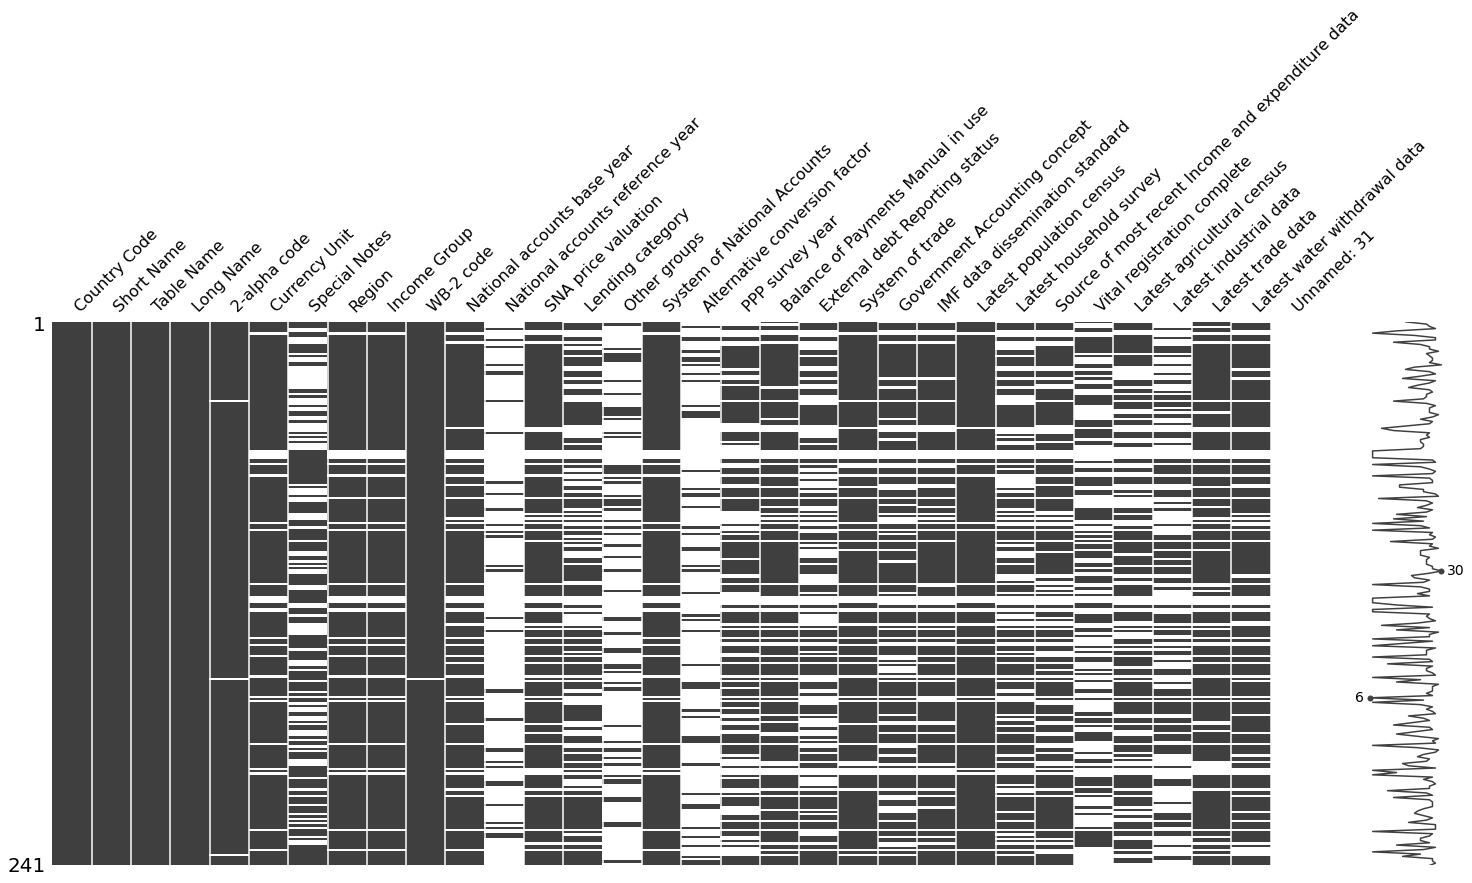

In [150]:
#Valeurs manquant heatmap
msno.matrix(df_EdStatsCountry, False, True)

In [151]:
#Count de valeurs unique
df_EdStatsCountry.nunique()

Country Code                                         241
Short Name                                           241
Table Name                                           241
Long Name                                            241
2-alpha code                                         238
Currency Unit                                        152
Special Notes                                        131
Region                                                 7
Income Group                                           5
WB-2 code                                            240
National accounts base year                           43
National accounts reference year                      11
SNA price valuation                                    2
Lending category                                       3
Other groups                                           2
System of National Accounts                            3
Alternative conversion factor                         32
PPP survey year                

In [152]:
#Duplicate

double = df_EdStatsCountry[df_EdStatsCountry.duplicated(['Country Code'], keep=False)]
nb_doubles_code_pays = double.shape[0]
print(f'Nombre de doublons sur le Country Code : {nb_doubles_code_pays}')

double2 = df_EdStatsCountry[df_EdStatsCountry.duplicated(['Short Name'], keep=False)]
nb_doubles_short_name = double2.shape[0]
print(f'Nombre de doublons sur le Short Name : {nb_doubles_short_name}')

double3 = df_EdStatsCountry[df_EdStatsCountry.duplicated(['Table Name'], keep=False)]
nb_doubles_table_name = double3.shape[0]
print(f'Nombre de doublons sur le Short Name : {nb_doubles_table_name}')

double4 = df_EdStatsCountry[df_EdStatsCountry.duplicated(['Long Name'], keep=False)]
nb_doubles_long_name = double4.shape[0]
print(f'Nombre de doublons sur le Long Name : {nb_doubles_long_name}')



Nombre de doublons sur le Country Code : 0
Nombre de doublons sur le Short Name : 0
Nombre de doublons sur le Short Name : 0
Nombre de doublons sur le Long Name : 0


In [153]:
#Il y a 7 regions dans la colonne Regions
df_EdStatsCountry['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [154]:
df_EdStatsCountry['Region'].isnull().sum()

27

In [155]:
#Remplacer les nan avec 'Other'
df_EdStatsCountry['Region'] = df_EdStatsCountry['Region'].replace(np.nan, 'Other')
print('Régions :\n',df_EdStatsCountry['Region'].unique())

Régions :
 ['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'Other' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


In [156]:
#Il y a 5 groupes de revenus différents dans la colonne
df_EdStatsCountry['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [157]:
#Remplacer les nan avec 'Other'
df_EdStatsCountry['Income Group'] = df_EdStatsCountry['Income Group'].replace(np.nan, 'Other')
print('Income Group :\n',df_EdStatsCountry['Income Group'].unique())

Income Group :
 ['High income: nonOECD' 'Low income' 'Upper middle income' 'Other'
 'Lower middle income' 'High income: OECD']


In [158]:
#Groupby Region et Country, pour comprendre combien de pays il y a dans chaque région
nb_pays_par_region=df_EdStatsCountry.groupby('Region')[['Country Code']].count().reset_index().sort_values(by='Country Code', ascending=False)

<a class="anchor" id="section_3_1"></a>Nombre de pays par region

In [159]:
nb_pays_par_region

,Region,Country Code
1,Europe & Central Asia,57
7,Sub-Saharan Africa,48
2,Latin America & Caribbean,41
0,East Asia & Pacific,36
5,Other,27
3,Middle East & North Africa,21
6,South Asia,8
4,North America,3


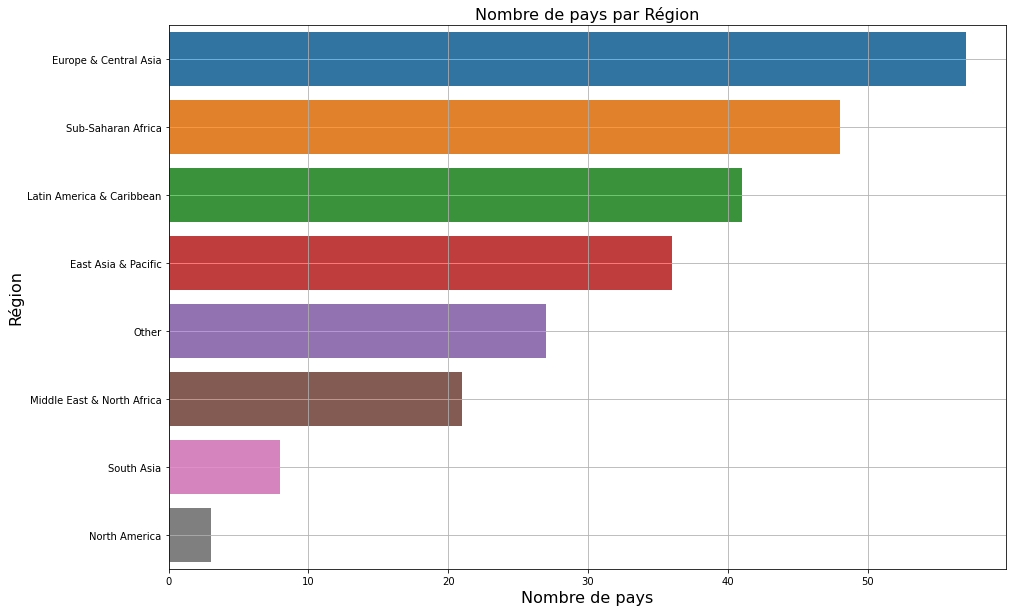

In [160]:
fig=plt.figure(figsize=(15,10))

grid = plt.GridSpec(2, 2, wspace=0.8, hspace=0.3)
sns.barplot(nb_pays_par_region['Country Code'], nb_pays_par_region['Region'])
plt.xlabel('Nombre de pays', fontsize=16)
plt.ylabel('Région', fontsize=16)
plt.title('Nombre de pays par Région', fontsize=16)
plt.grid(True)

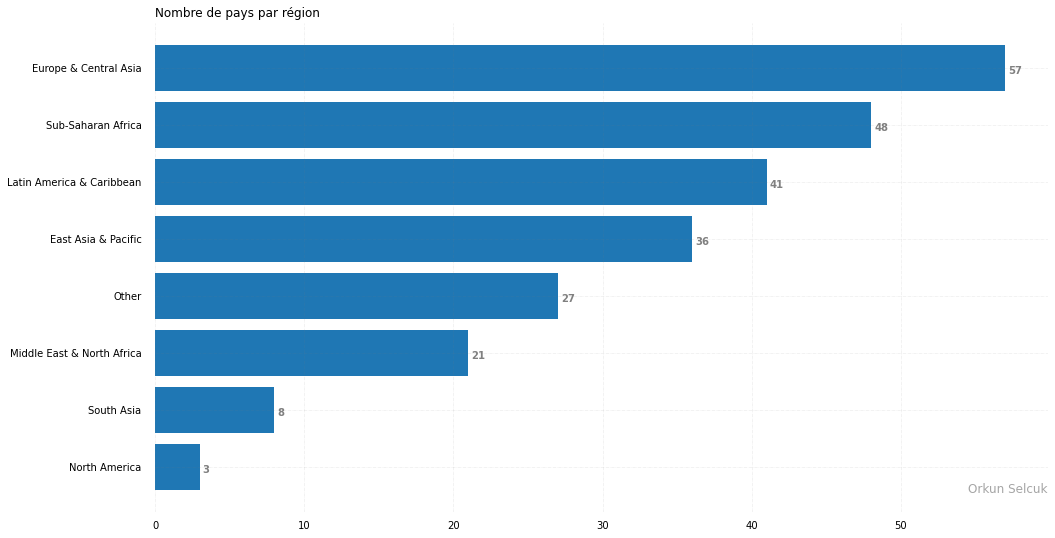

In [161]:
region = nb_pays_par_region['Region'].head(12)
country = nb_pays_par_region['Country Code'].head(12)

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(region, country)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Nombre de pays par région',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Orkun Selcuk', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()


In [162]:
#Groupby Income and Country
nb_pays_par_group_revenu=df_EdStatsCountry.groupby('Income Group')[['Region']].count().reset_index().sort_values(by='Region', ascending=False)

<a class="anchor" id="section_3_2"></a>Nombre de pays par groupe de revenu

In [163]:
nb_pays_par_group_revenu

,Income Group,Region
5,Upper middle income,55
3,Lower middle income,50
1,High income: nonOECD,44
2,Low income,34
0,High income: OECD,31
4,Other,27


In [164]:
country

1    57
7    48
2    41
0    36
5    27
3    21
6     8
4     3
Name: Country Code, dtype: int64

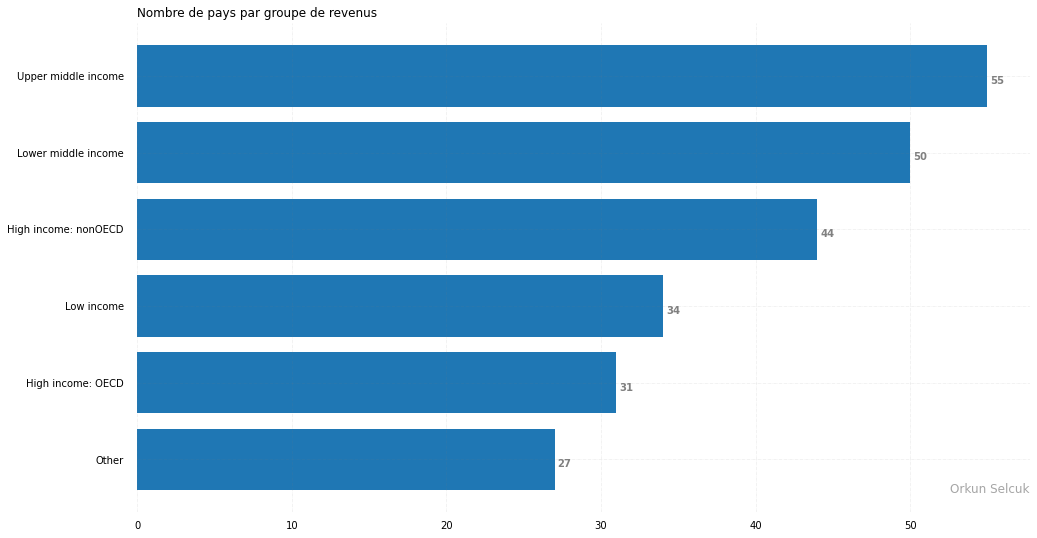

In [165]:
# Regroupement des pays par groupe de revenus
country = nb_pays_par_group_revenu['Region'].head(12)
income = nb_pays_par_group_revenu['Income Group'].head(12)

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(income,country)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Nombre de pays par groupe de revenus',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Orkun Selcuk', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)
plt.grid(True)
# Show Plot
plt.show()


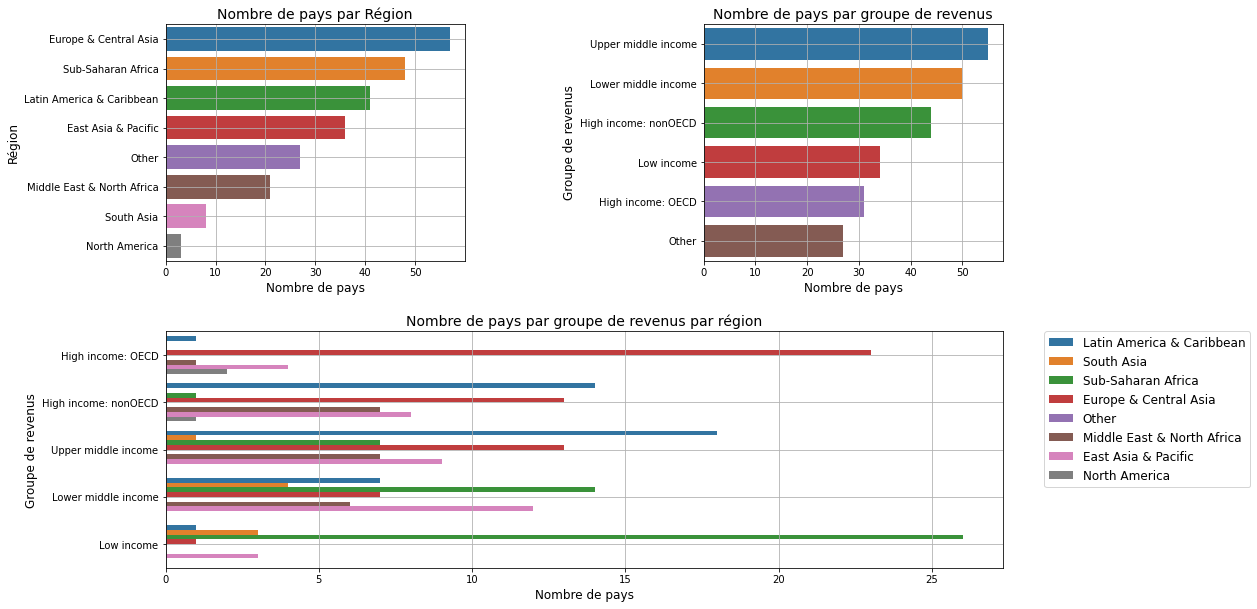

In [166]:
# Regroupement des pays/régions/groupes de revenus

fig=plt.figure(figsize=(15,10))
grid = plt.GridSpec(2, 2, wspace=0.8, hspace=0.3)

plt.subplot(grid[0, 0])
# Regroupement des pays par régions
nb_pays_par_region=df_EdStatsCountry.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)

sns.barplot(nb_pays_par_region['Short Name'].sort_values(), nb_pays_par_region['Region'])
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Région', fontsize=12)
plt.title('Nombre de pays par Région', fontsize=14)
plt.grid(True)


plt.subplot(grid[0, 1])
# Regroupement des pays par groupe de revenus
nb_pays_par_groupe_revenu=df_EdStatsCountry.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)

sns.barplot(nb_pays_par_groupe_revenu['Short Name'].sort_values(), nb_pays_par_groupe_revenu['Income Group'])
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupe de revenus', fontsize=12)
plt.title('Nombre de pays par groupe de revenus', fontsize=14)
plt.grid(True)


plt.subplot(grid[1, :])
# Regroupement des pays par groupe de revenus

sns.countplot(y='Income Group', hue='Region', data=df_EdStatsCountry, orient='h',
                   order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'])
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupe de revenus', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.title('Nombre de pays par groupe de revenus par région', fontsize=14)
plt.grid(True)

plt.show()

In [167]:
df_EdStatsCountry.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                 0
Income Group                                           0
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [168]:
df_EdStatsCountry.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

<a class="anchor" id="section_3_4"></a>Conclusion

<a class="anchor" id="chapter4"></a>Etude sur le dataset EdStatsCountry_Series.csv

In [169]:
df_EdStatsCountry_Series

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United Nations World Population Prospects",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN


In [170]:
#Nommes de colonne
df_EdStatsCountry_Series.columns.to_list()

['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3']

In [171]:
df_EdStatsCountry_Series.shape
#Il y a 613 lignes et 4 colonnes

(613, 4)

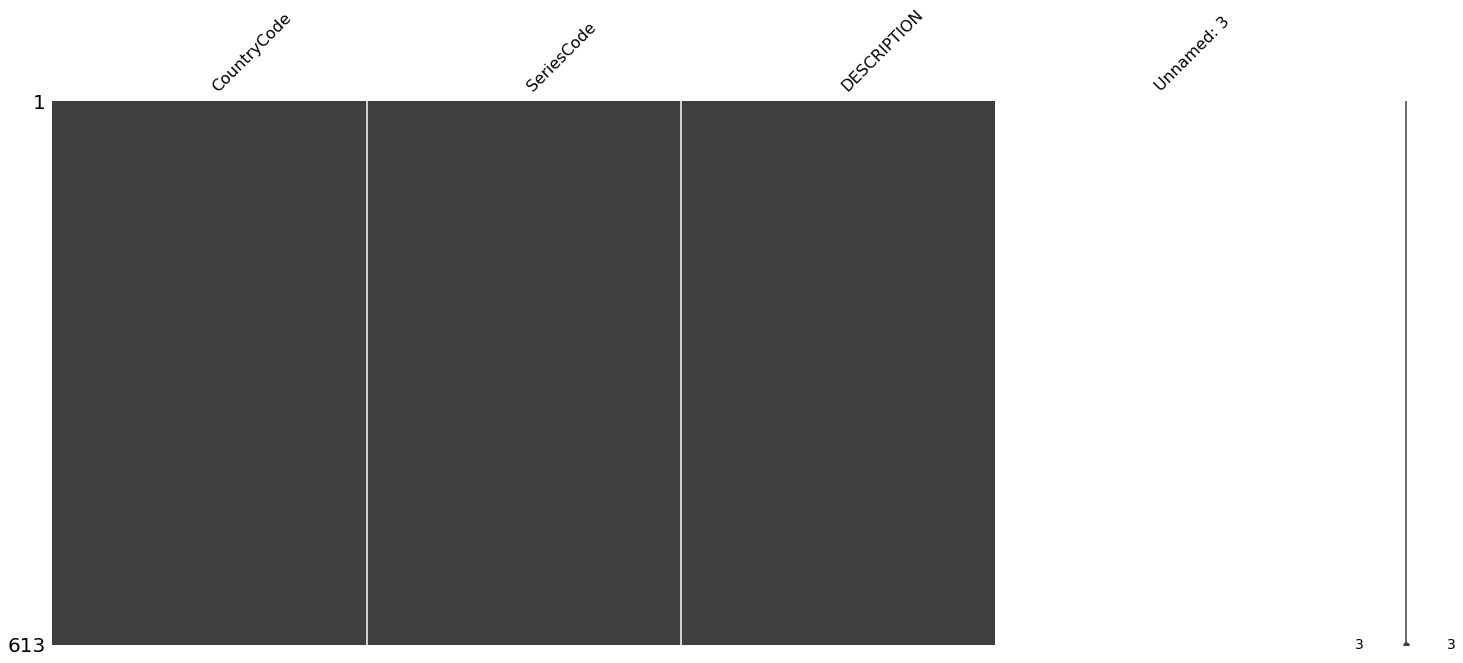

In [172]:
# Valeurs manquantes
msno.matrix(df_EdStatsCountry_Series, False, True)

In [173]:
df_EdStatsCountry_Series.isna().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [174]:
df_EdStatsCountry_Series.count().sum()

1839

In [175]:
df_EdStatsCountry_Series.isna().sum().sum()

613

In [176]:
#Pourcentage de valuers manquant dans EdStatsCountry

((df_EdStatsCountry_Series.isnull() | df_EdStatsCountry_Series.isna()).sum() * 100 / df_EdStatsCountry_Series.index.size).round(2)

CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
Unnamed: 3     100.0
dtype: float64

In [177]:
df_EdStatsCountry_Series[df_EdStatsCountry_Series.duplicated(keep=False)].shape[0]

0

In [178]:
# Le nombre de code ISO aplha 3 ne sont pas egale a code ISO alpha 3 du jeu de données EdStatsCountry.csv
df_EdStatsCountry['Country Code'].nunique() == df_EdStatsCountry_Series['CountryCode'].nunique()

False

In [179]:
# Recherche des noms des pays n'existe pas dans le jeu de données EdStatsCountry-Series.csv
df_EdStatsCountry[~df_EdStatsCountry['Country Code'].isin(df_EdStatsCountry_Series['CountryCode'])][['Short Name']].sort_values(by = 'Short Name')

,Short Name
5,Arab World
47,Curaçao
58,East Asia & Pacific (all income levels)
57,East Asia & Pacific (developing only)
63,Euro area
60,Europe & Central Asia (all income levels)
59,Europe & Central Asia (developing only)
68,European Union
92,Heavily indebted poor countries (HIPC)
89,High income


<a class="anchor" id="section_4_1"></a>Nombre de pays par code indicateur et nombre de pays pour les tops 10 descriptions

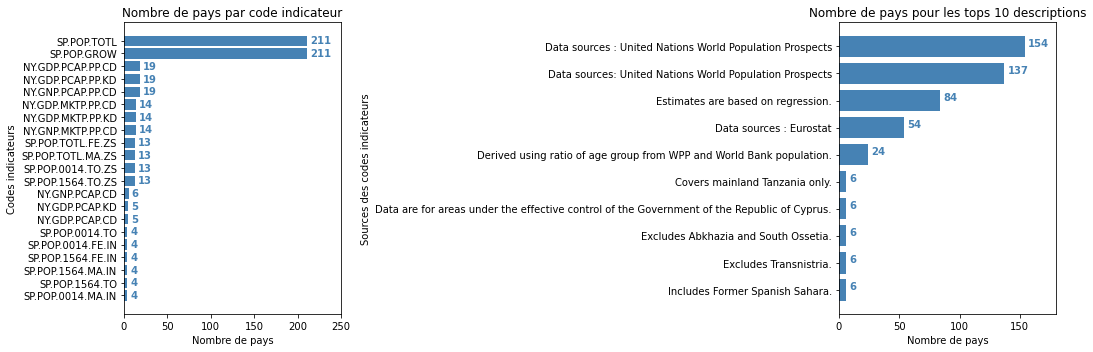

In [180]:
# Regroupement des pays par code indicateur et des pays par description

fig, ax = plt.subplots(1, 2, figsize=(15, 5))  

serie_code = df_EdStatsCountry_Series.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['SeriesCode']
nb_pays_par_serie_code=df_EdStatsCountry_Series.groupby('SeriesCode')[['CountryCode']].count()['CountryCode'].sort_values()
ax1=ax[0]
ax1.barh(y = serie_code, width=nb_pays_par_serie_code, color='SteelBlue')
for i, v in enumerate(nb_pays_par_serie_code):
    ax1.text(v + 3, i - .22, str(v), color='SteelBlue', fontsize=10, fontweight='bold')
ax1.set_title('Nombre de pays par code indicateur', fontsize=12)
ax1.set_xlabel('Nombre de pays', fontsize=10)
ax1.set_ylabel('Codes indicateurs', fontsize=10)
ax1.tick_params(labelsize=10)
ax1.set_xlim([0, 250])
ax1.grid(False)

description = df_EdStatsCountry_Series.groupby('DESCRIPTION')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['DESCRIPTION'].tail(10)
nb_pays_par_description=df_EdStatsCountry_Series.groupby('DESCRIPTION')[['CountryCode']].count()['CountryCode'].sort_values().tail(10)
ax2=ax[1]
ax2.barh(y = description, width=nb_pays_par_description, color='SteelBlue')
for i, v in enumerate(nb_pays_par_description):
    ax2.text(v + 3, i + .01, str(v), color='SteelBlue', fontsize=10, fontweight='bold')
ax2.set_title('Nombre de pays pour les tops 10 descriptions', fontsize=12)
ax2.set_xlabel('Nombre de pays', fontsize=10)
ax2.set_ylabel('Sources des codes indicateurs', fontsize=10)
ax2.tick_params(labelsize=10)
ax2.set_xlim([0, 180])
ax2.grid(False)

fig.tight_layout()
plt.show()

<a class="anchor" id="section_4_2"></a>Conclusion

<a class="anchor" id="chapter5"></a>Etude sur le dataset EdStatsFooTNote.csv

In [181]:
df_EdStatsFootNote

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
...,...,...,...,...,...
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN


In [182]:
df_EdStatsFootNote.columns.to_list()

['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4']

In [183]:
df_EdStatsFootNote.shape
#Il y a 5 colonnes et 643638 lignes

(643638, 5)

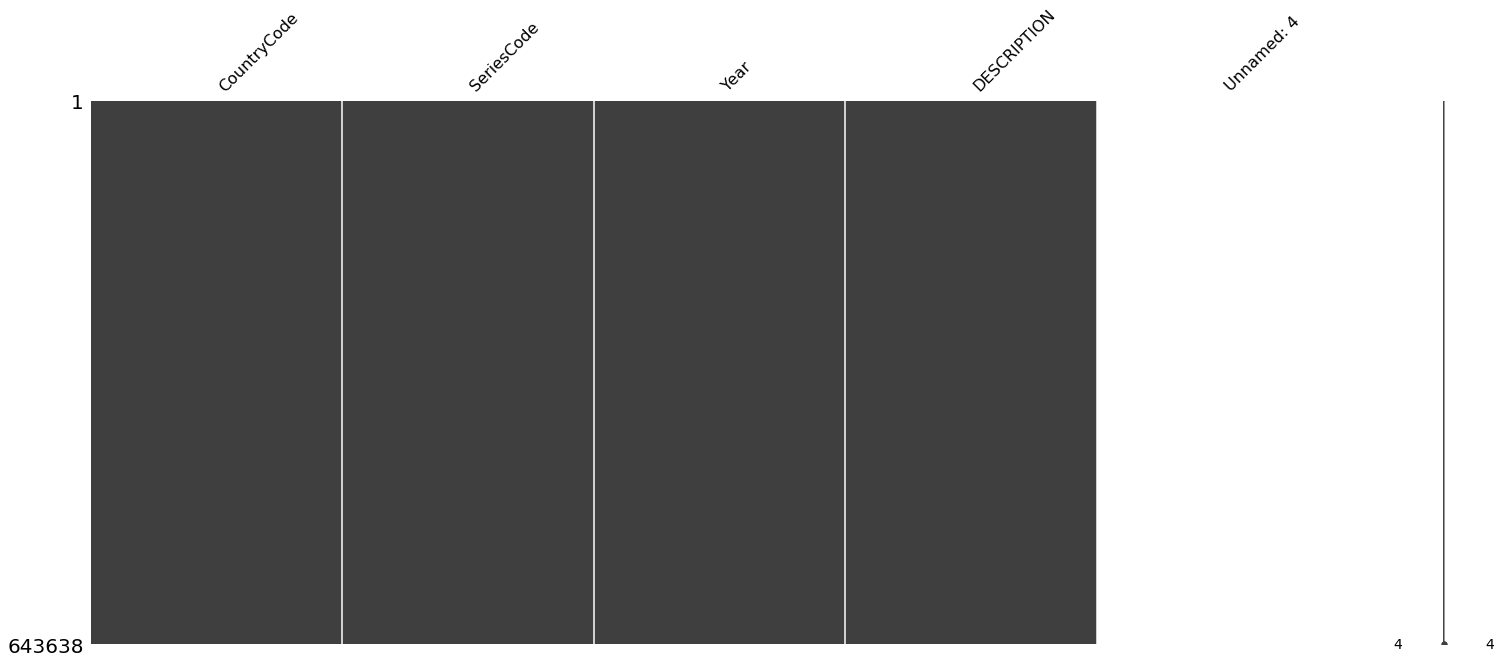

In [184]:
# Valeurs manquantes
msno.matrix(df_EdStatsFootNote, False, True)

In [185]:
df_EdStatsFootNote.isna().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

In [186]:
df_EdStatsFootNote.count().sum()

2574552

In [187]:
df_EdStatsFootNote.isna().sum().sum()

643638

In [188]:
#Pourcentage de valeurs manquants dans EdStatsFootNote
((df_EdStatsFootNote.isnull() | df_EdStatsFootNote.isna()).sum() * 100 / df_EdStatsFootNote.index.size).round(2)

CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
Unnamed: 4     100.0
dtype: float64

In [189]:
#643638 NaN pour 3218190 données

In [190]:
# Doublon avec toutes les colonnes du dataframe
df_EdStatsFootNote[df_EdStatsFootNote.duplicated(keep=False)].shape[0]

0

In [191]:
# Doublons sur les 2 colonnes CountryCode et SeriesCode
doublons_CC_SC = df_EdStatsFootNote[df_EdStatsFootNote.duplicated(['CountryCode', 'SeriesCode'], keep=False)]

doublons_CC_SC


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
...,...,...,...,...,...
643632,ZWE,SH.DYN.MORT,YR2004,Uncertainty bound is 90.7 - 107.8,NaN
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN


In [192]:
# Doublons sur la colonne CountryCode
doublons_CC = df_EdStatsFootNote[df_EdStatsFootNote.duplicated(['DESCRIPTION'], keep=False)]
print(doublons_CC.shape)

doublons_CC
#

(635775, 5)


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
...,...,...,...,...,...
643621,ZWE,SE.SEC.ENRL.GC.FE.ZS,YR2000,Country estimation.,NaN
643622,ZWE,SE.SEC.TCHR.FE,YR1999,Country estimation.,NaN
643623,ZWE,SE.SEC.TCHR.FE,YR2003,Country estimation.,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN


In [193]:
df_EdStatsFootNote['DESCRIPTION'].nunique()
#Il y a 9102 valeurs uniques dans Description

9102

In [194]:
# Le nombre de code ISO alpha 3 ne correspond pas au code ISO alpha 3 du jeu de données EdStatsCountry-Series.csv.
df_EdStatsCountry_Series['CountryCode'].nunique() == df_EdStatsFootNote['CountryCode'].nunique()

False

In [195]:
# Recherche des noms des pays n'apparaissant pas dans le jeu de données EdStatsCountry-Series.csv
pays_diff = df_EdStatsCountry[~df_EdStatsCountry['Country Code'].isin(df_EdStatsFootNote['CountryCode'])][['Short Name']].sort_values(by = 'Short Name');
pays_diff

,Short Name
85,Greenland
207,Sint Maarten (Dutch part)
134,St. Martin (French part)


<a class="anchor" id="section_5_1"></a>Top 10 du nombre de pays par code indicateur

(0.0, 10800.0)

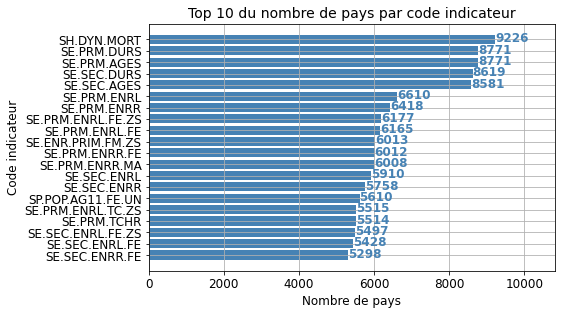

In [196]:
# Regroupement des pays par code indicateur 

plt.figure(figsize=(16, 10))
G = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(G[0, 0])

# Top 10 du nombre de pays par code indicateur
serie_code = df_EdStatsFootNote.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['SeriesCode'].tail(20)
nb_pays_par_serie_code=df_EdStatsFootNote.groupby('SeriesCode')[['CountryCode']].count()['CountryCode'].sort_values().tail(20)
ax1.barh(y = serie_code, width=nb_pays_par_serie_code,color='SteelBlue')
for i, v in enumerate(nb_pays_par_serie_code):
    ax1.text(v + 3, i - .2, str(v), color='SteelBlue', fontweight='bold', fontsize='12')
ax1.set_title('Top 10 du nombre de pays par code indicateur', fontsize=14)
ax1.set_xlabel('Nombre de pays', fontsize='12')
ax1.set_ylabel('Code indicateur', fontsize='12')
ax1.tick_params(labelsize=12)
ax1.grid(True)
ax1.set_xlim([0, 10800])

<a class="anchor" id="section_5_2"></a>Top 10 du nombre de pays par description

(0.0, 245000.0)

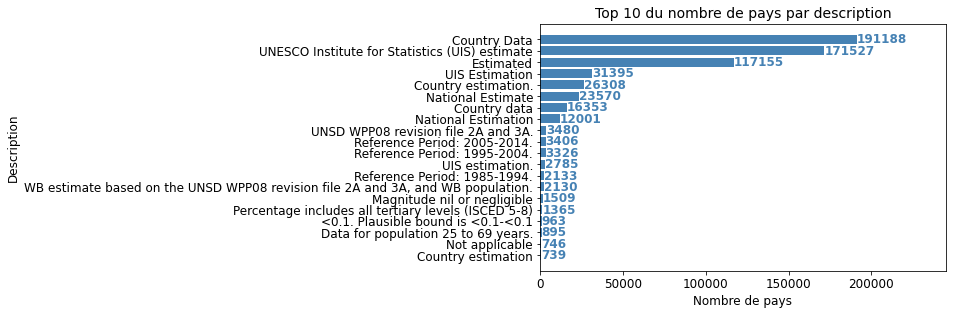

In [197]:
plt.figure(figsize=(16, 10))
G = gridspec.GridSpec(2, 2)
ax2 = plt.subplot(G[0, 1])
# Top 10 du nombre de pays par description
description = df_EdStatsFootNote.groupby('DESCRIPTION')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['DESCRIPTION'].tail(20)
nb_pays_par_description=df_EdStatsFootNote.groupby('DESCRIPTION')[['CountryCode']].count()['CountryCode'].sort_values().tail(20)
ax2.barh(y = description, width=nb_pays_par_description, color='SteelBlue')
for i, v in enumerate(nb_pays_par_description):
    ax2.text(v + 10, i - .3, str(v), color='SteelBlue', fontweight='bold', fontsize='12')
ax2.set_title('Top 10 du nombre de pays par description', fontsize='14')
ax2.set_xlabel('Nombre de pays', fontsize='12')
ax2.set_ylabel('Description', fontsize='12')
ax2.tick_params(labelsize=12)
ax2.grid(False)
ax2.set_xlim([0, 245000])

In [198]:
#Pour pouvoir mieux observer l'année, nous changeons son nom
#il prend les 4 derniers chiffres
df_EdStatsFootNote['Annee']=[row[-4:] for row in df_EdStatsFootNote['Year']]

In [199]:
df_EdStatsFootNote

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4,Annee
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN,2001
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN,2005
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN,2000
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN,2004
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN,2006
...,...,...,...,...,...,...
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN,2007
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN,2014
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN,2015
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN,2017


<a class="anchor" id="section_5_3"></a>Nombre de pays avec des changement de codes series par années

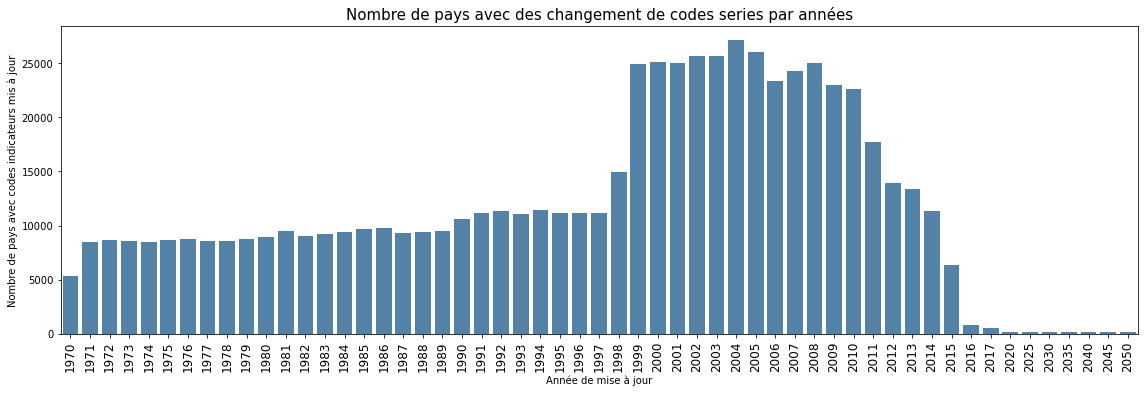

In [200]:
plt.figure(figsize=(16, 10))
G = gridspec.GridSpec(2, 2)

ax3 = plt.subplot(G[1, :])
ax3.set_title('Nombre de pays avec des changement de codes series par années', size=15)
ax3 = sns.barplot(y = 'CountryCode', x='Annee', data = df_EdStatsFootNote.groupby('Annee').count().reset_index(), color='SteelBlue')

ax3.set_xticklabels(labels = df_EdStatsFootNote.groupby('Annee').count().reset_index()['Annee'], rotation=90, size=12)
ax3.set_xlabel('Année de mise à jour')
ax3.set_ylabel('Nombre de pays avec codes indicateurs mis à jour')

plt.tight_layout()
plt.show()

<a class="anchor" id="section_5_4"></a>Conclusion

<a class="anchor" id="chapter6"></a>Etude sur le dataset EdStatsSeries.csv

In [201]:
df_EdStatsSeries

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary student (constant US$),NaN,"Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in US$ at market exchange rates, in constant prices. The constant prices base year is normally three years before the year of the data release. Divide total government expenditure (in constant US$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. This indicator is useful to compare average spending on one student between levels of education, over time, or between countries. Constant US$ allow comparing absolute values using a common currency, and taking into account the effect of inflation. This indicator should not be considered a unit cost, since it only includes what the government spends, and not total spending per student (including household contributions). Since it is a simple division of total government expenditure by the number of students at a given level, whether they attend public or private institutions, in countries where private provision and/or funding of education is higher the average amount per student will appear lower. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-tertiary student (constant US$),NaN,"Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in US$ at market exchange rates, in constant prices. The constant prices base year is normally three years before the year of the data release. Divide total government expenditure (in const

In [202]:
df_EdStatsSeries.columns.to_list()

['Series Code',
 'Topic',
 'Indicator Name',
 'Short definition',
 'Long definition',
 'Unit of measure',
 'Periodicity',
 'Base Period',
 'Other notes',
 'Aggregation method',
 'Limitations and exceptions',
 'Notes from original source',
 'General comments',
 'Source',
 'Statistical concept and methodology',
 'Development relevance',
 'Related source links',
 'Other web links',
 'Related indicators',
 'License Type',
 'Unnamed: 20']

In [203]:
df_EdStatsSeries.shape
#there are 3665 rows and 21 columns

(3665, 21)

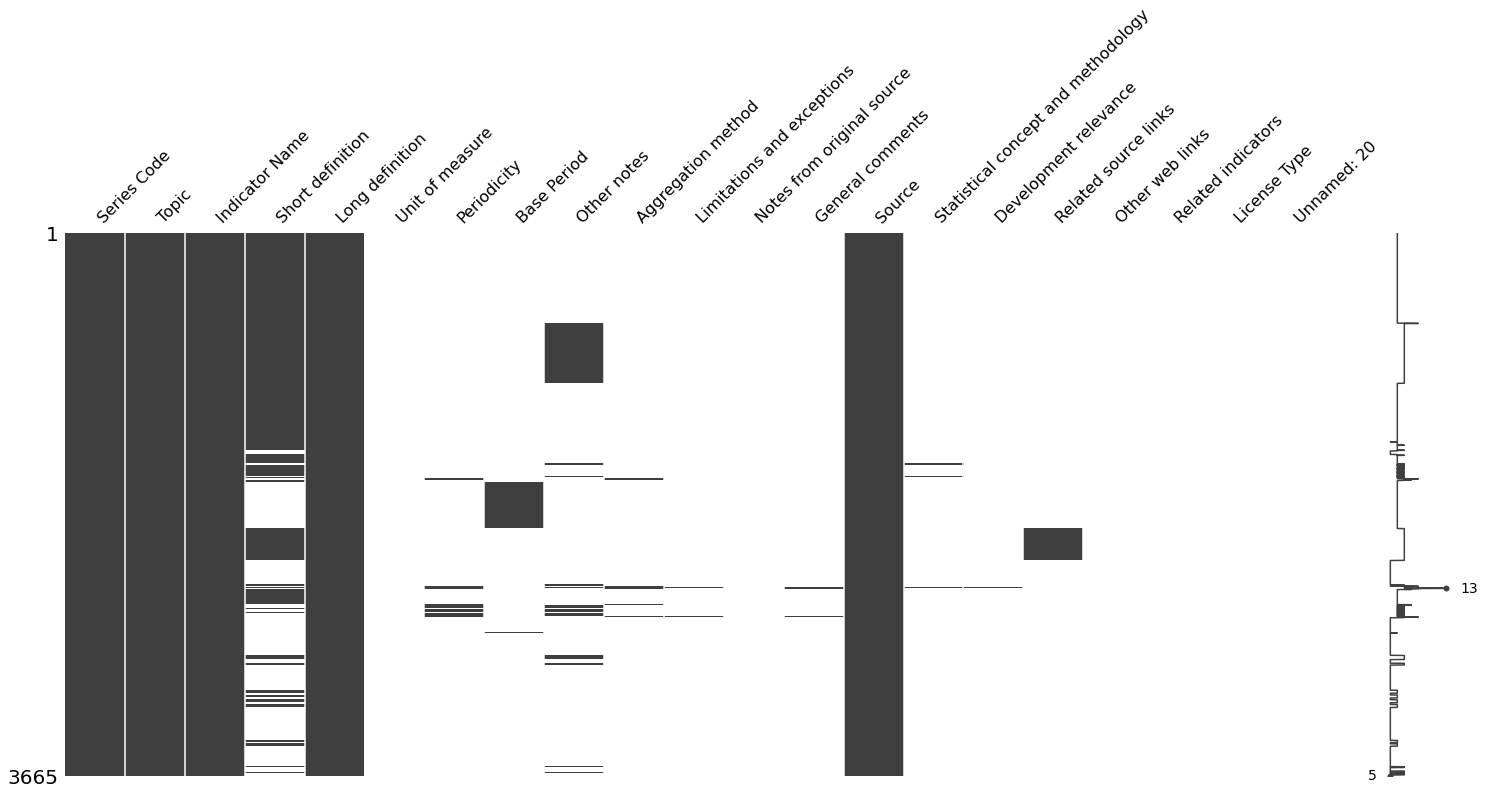

In [204]:
# Valeurs manquantes
msno.matrix(df_EdStatsSeries, False, True)

In [205]:
df_EdStatsSeries.isna().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

In [206]:
df_EdStatsSeries.count().sum()

21762

In [207]:
df_EdStatsSeries.isna().sum().sum()
#55203 NaN pour 76965 données 

55203

In [208]:
#Pourcentage de valuers manquants dans EdStatsCountry
((df_EdStatsSeries.isnull() | df_EdStatsSeries.isna()).sum() * 100 / df_EdStatsSeries.index.size).round(2)

Series Code                              0.00
Topic                                    0.00
Indicator Name                           0.00
Short definition                        41.17
Long definition                          0.00
Unit of measure                        100.00
Periodicity                             97.30
Base Period                             91.43
Other notes                             84.94
Aggregation method                      98.72
Limitations and exceptions              99.62
Notes from original source             100.00
General comments                        99.62
Source                                   0.00
Statistical concept and methodology     99.37
Development relevance                   99.92
Related source links                    94.13
Other web links                        100.00
Related indicators                     100.00
License Type                           100.00
Unnamed: 20                            100.00
dtype: float64

In [209]:
df_EdStatsSeries[df_EdStatsSeries.duplicated(keep=False)].shape[0]
#Pas de valeurs dupliquées

0

In [210]:
df_EdStatsSeries['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [211]:
df_EdStatsSeries['Topic'].nunique()

37

<a class="anchor" id="section_6_1"></a>Nombre de indicateurs les 10 thèmes plus fréquents et nombre de indicateurs par les 27 thèmes le moins fréquent

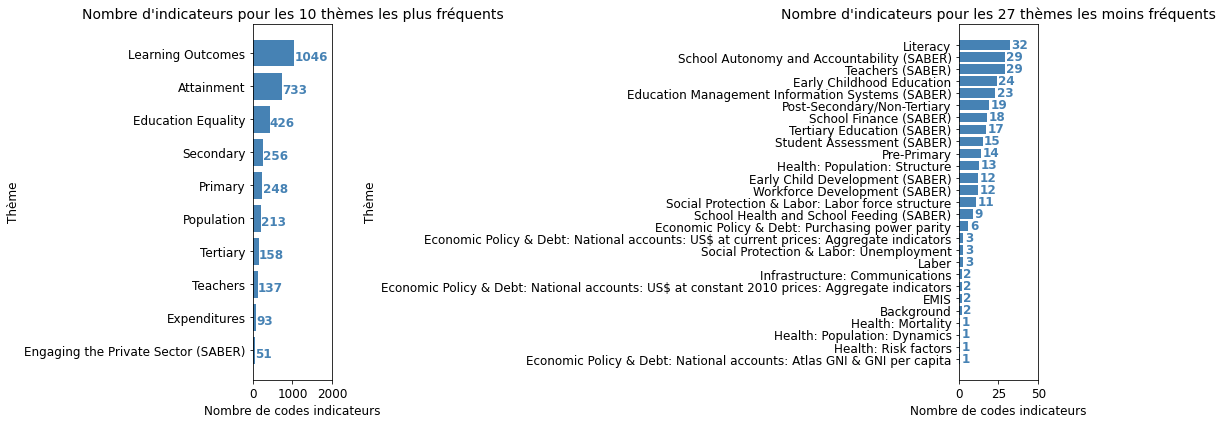

In [212]:
# Regroupement des pays par code indicateur et des pays par description

fig, ax = plt.subplots(1, 2, figsize=(15, 6))  


# Top 10 des thèmes les plus fréquents 
theme = df_EdStatsSeries.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code')['Topic'].tail(10)
nb_code_par_theme=df_EdStatsSeries.groupby('Topic')[['Series Code']].count()['Series Code'].sort_values().tail(10)
ax1=ax[0]
ax1.barh(y = theme, width=nb_code_par_theme, color='SteelBlue')
for i, v in enumerate(nb_code_par_theme):
    ax1.text(v + 3, i - .2, str(v), color='SteelBlue', fontweight='bold', fontsize=12)
ax1.set_title('Nombre d\'indicateurs pour les 10 thèmes les plus fréquents', fontsize=14)
ax1.set_xlabel('Nombre de codes indicateurs', fontsize=12)
ax1.set_ylabel('Thème', fontsize=12)
ax1.tick_params(labelsize=12)
ax1.grid(False)
ax1.set_xlim([0, 2000])


# last 27 thèmes les moins fréquents
theme_moins = df_EdStatsSeries.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code')['Topic'].head(27)
nb_code_par_theme_moins=df_EdStatsSeries.groupby('Topic')[['Series Code']].count()['Series Code'].sort_values().head(27)
ax2=ax[1]
ax2.barh(y = theme_moins, width=nb_code_par_theme_moins, color='SteelBlue')
for i, v in enumerate(nb_code_par_theme_moins):
    ax2.text(v + 1, i - .25, str(v), color='SteelBlue', fontweight='bold', fontsize=12)
ax2.set_title('Nombre d\'indicateurs pour les 27 thèmes les moins fréquents', fontsize=14)
ax2.set_xlabel('Nombre de codes indicateurs', fontsize=12)
ax2.set_ylabel('Thème', fontsize=12)
ax2.tick_params(labelsize=12)
ax2.grid(False)
ax2.set_xlim([0, 50])

fig.tight_layout()
plt.show()

In [213]:
df_tmp=df_EdStatsSeries[['Series Code','Indicator Name', 'Short definition', 'Long definition']]
#Creating a new df to keep the series code and its definitions

<a class="anchor" id="section_6_2"></a>Conclusion

<a class="anchor" id="chapter7"></a>Etude sur le dataset EdStatsData.csv

In [214]:
df_EdStatsData

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,54.82212,54.89414,56.20944,57.26711,57.99114,59.36554,60.99996,61.92268,62.69342,64.38319,65.61777,66.08515,66.60814,67.29045,68.51009,69.03321,69.94491,71.04187,71.69378,71.6991,71.99582,72.60284,70.03272,70.46482,72.64568,71.81176,73.90351,74.4252,75.11082,76.25432,77.24568,78.80052,80.0514,80.80539,81.60706,82.48949,82.68551,83.28034,84.01187,84.19596,85.212,85.24514,86.10167,85.51194,85.32015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male (number)",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, both sexes (%)",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.02185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.41136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.42812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, female (%)",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.81224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.35344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.18835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, gender parity index (GPI)",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9

In [215]:
df_EdStatsData.columns.to_list()

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020',
 '2025',
 '2030',
 '2035',
 '2040',
 '2045',
 '2050',
 '2055',
 '2060',
 '2065',
 '2070',
 '2075',
 '2080',
 '2085',
 '2090',
 '2095',
 '2100',
 'Unnamed: 69']

In [216]:
df_EdStatsData.shape
#Il y a 886930 lignes et 70 colonnes

(886930, 70)

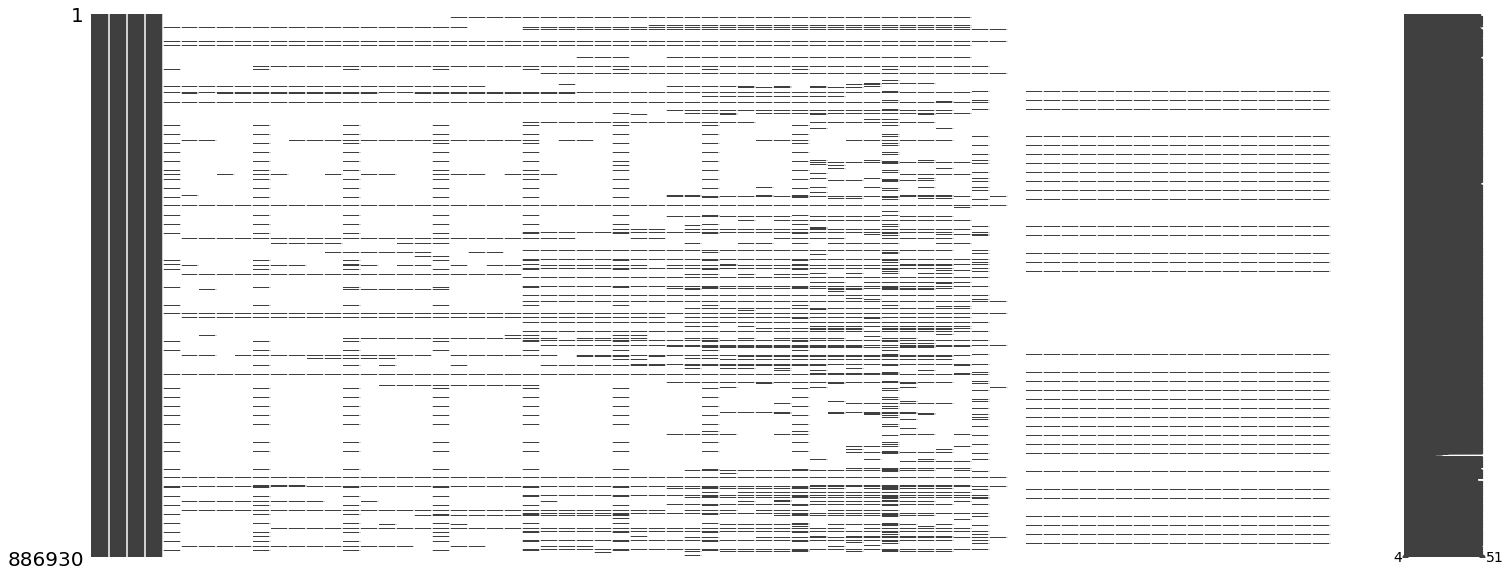

In [217]:
# Valeurs manquantes
msno.matrix(df_EdStatsData, False, True)

In [218]:
df_EdStatsData.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004        

In [219]:
df_EdStatsData.isna().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
1971              851393
1972              851311
1973              851385
1974              851200
1975              799624
1976              849447
1977              849356
1978              849354
1979              850121
1980              797808
1981              848153
1982              849419
1983              848470
1984              848324
1985              796634
1986              847558
1987              848289
1988              848378
1989              849390
1990              762525
1991              812493
1992              811387
1993              811137
1994              809468
1995              755569
1996              810123
1997              813477
1998              802016
1999              768091
2000              710254
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822


In [220]:
df_EdStatsData.count().sum()

8629921

In [221]:
df_EdStatsData.isna().sum().sum()
#53455179 NaN pour 62085100 données 

53455179

In [222]:
#Pourcentage de valuers manquantes dans EdStatsCountry
((df_EdStatsData.isnull() | df_EdStatsData.isna()).sum() * 100 / df_EdStatsData.index.size).round(2)

Country Name        0.00
Country Code        0.00
Indicator Name      0.00
Indicator Code      0.00
1970               91.85
1971               95.99
1972               95.98
1973               95.99
1974               95.97
1975               90.16
1976               95.77
1977               95.76
1978               95.76
1979               95.85
1980               89.95
1981               95.63
1982               95.77
1983               95.66
1984               95.65
1985               89.82
1986               95.56
1987               95.64
1988               95.65
1989               95.77
1990               85.97
1991               91.61
1992               91.48
1993               91.45
1994               91.27
1995               85.19
1996               91.34
1997               91.72
1998               90.43
1999               86.60
2000               80.08
2001               86.07
2002               86.00
2003               85.30
2004               85.48
2005               79.24


In [223]:
df_EdStatsData[df_EdStatsData.duplicated(keep=False)].shape[0]
#Pas de valeurs dupliquées

0

In [224]:
# Le nombre de Country Code ne sont pas pareil de Country Code du dataset EdStatsCountry.csv.
df_EdStatsData['Country Code'].nunique() == df_EdStatsCountry['Country Code'].nunique()

False

In [225]:
df_pays_extra=df_EdStatsData[~df_EdStatsData['Country Code'].isin(df_EdStatsCountry['Country Code'])][['Country Name']]
df_pays_extra.drop_duplicates(inplace=True)
df_pays_extra
# Le seul pays est British Virgin Islands

,Country Name
190580,British Virgin Islands


In [226]:
# Le nombre de Country Code ne sont pas pareil de Country Code du dataset EdStatsCountry_Series.csv.
df_EdStatsData['Country Code'].nunique() == df_EdStatsCountry_Series['CountryCode'].nunique()

False

In [227]:
df_pays_extra2=df_EdStatsData[~df_EdStatsData['Country Code'].isin(df_EdStatsCountry_Series['CountryCode'])][['Country Name']]
df_pays_extra2.drop_duplicates(inplace=True)
df_pays_extra2
# Le difference entre 2 datasets sont: des noms de région, des noms de regroupement de revenus, 
# regroupement de pays (European Union, North America..) et certains pays (St. Martin).

,Country Name
0,Arab World
3665,East Asia & Pacific
7330,East Asia & Pacific (excluding high income)
10995,Euro area
14660,Europe & Central Asia
18325,Europe & Central Asia (excluding high income)
21990,European Union
25655,Heavily indebted poor countries (HIPC)
29320,High income
32985,Latin America & Caribbean


In [228]:
a=pd.DataFrame([df_EdStatsData.loc[:,'1970':'2100'].notnull().sum()]).transpose()
a

,0
1970,72288
1971,35537
1972,35619
1973,35545
1974,35730
1975,87306
1976,37483
1977,37574
1978,37576
1979,36809


In [229]:
a.rename( columns={0 :'donees'}, inplace=True )

In [230]:
a

,donees
1970,72288
1971,35537
1972,35619
1973,35545
1974,35730
1975,87306
1976,37483
1977,37574
1978,37576
1979,36809


<a class="anchor" id="chapter7"></a>Nombre de données par dècennie et Taux de remplissage entre 2010-2017

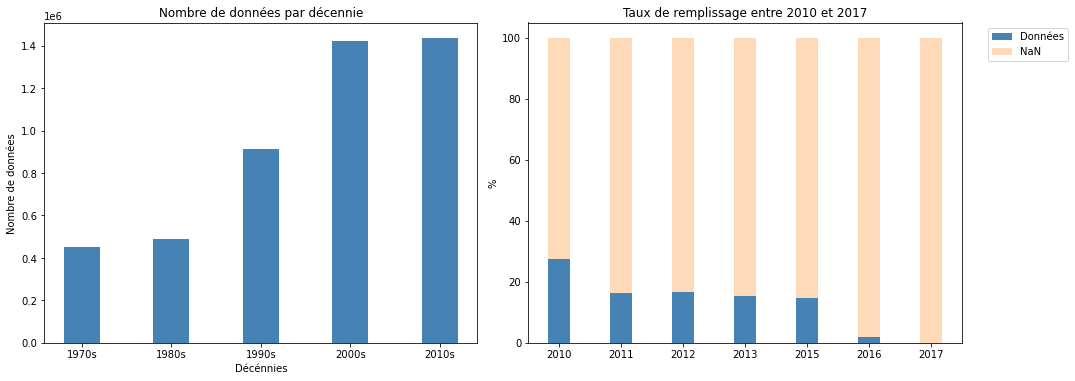

In [231]:
plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 2)


ax2 = plt.subplot(G[1, 0])
# Regroupement du nombre de données par décennie, les années 70, 80...
decade=df_EdStatsData.loc[:,'1970':'2020'].copy().count()
ans=['1970s','1980s','1990s','2000s','2010s']
for i in range(5):
    j=i*10
    k=j+10
    decade[ans[i]]=decade[j:k,].sum()
# Affihage de la répartitions des données exploitables par décennie
width = 0.4   
ax2.bar(decade[ans].index, decade[ans].values, width, color='SteelBlue')
# ax2 = sns.barplot(y = decade[ans].values, x = decade[ans].index, color='SteelBlue')
ax2.set_xlabel('Décénnies')
ax2.set_ylabel('Nombre de données')
ax2.set_title('Nombre de données par décennie', size=12)
ax2.grid(False)


ax3 = plt.subplot(G[1, 1])
# Nombre de données totales
nb_tot=df_EdStatsData.shape[0]
# Nombre de données non nulles par année de la décénnie 2010
annees=['2010','2011','2012','2013','2015','2016','2017']
nb_nonnul=df_EdStatsData.copy()[annees].count()
df_2010s = pd.DataFrame({'annee':nb_nonnul.index, 'nb_nonnul':nb_nonnul.values})
# Taux de données non nulles par année de la décénnie 2010
df_2010s['%_nonnul']=round((df_2010s['nb_nonnul'])*100/nb_tot,2)
# Nombre de NaN par année de la décénnie 2010
df_2010s['%_nan']=round(100-df_2010s['%_nonnul'],2)
width = 0.35      
annes=df_2010s.index
taux_remplissage=df_2010s['%_nonnul']
taux_nan=df_2010s['%_nan']
ax3.bar(annees, taux_remplissage, width, label='Données', color='SteelBlue')
ax3.bar(annees, taux_nan, width, bottom=taux_remplissage, label='NaN', color='PeachPuff')
ax3.set_ylabel('%')
ax3.set_title('Taux de remplissage entre 2010 et 2017')
ax3.legend(bbox_to_anchor=(1.05, 1),loc = 2)
ax3.grid(False)

plt.tight_layout()
plt.show()

<a class="anchor" id="section_7_2"></a>Répartition du nombre de données par années

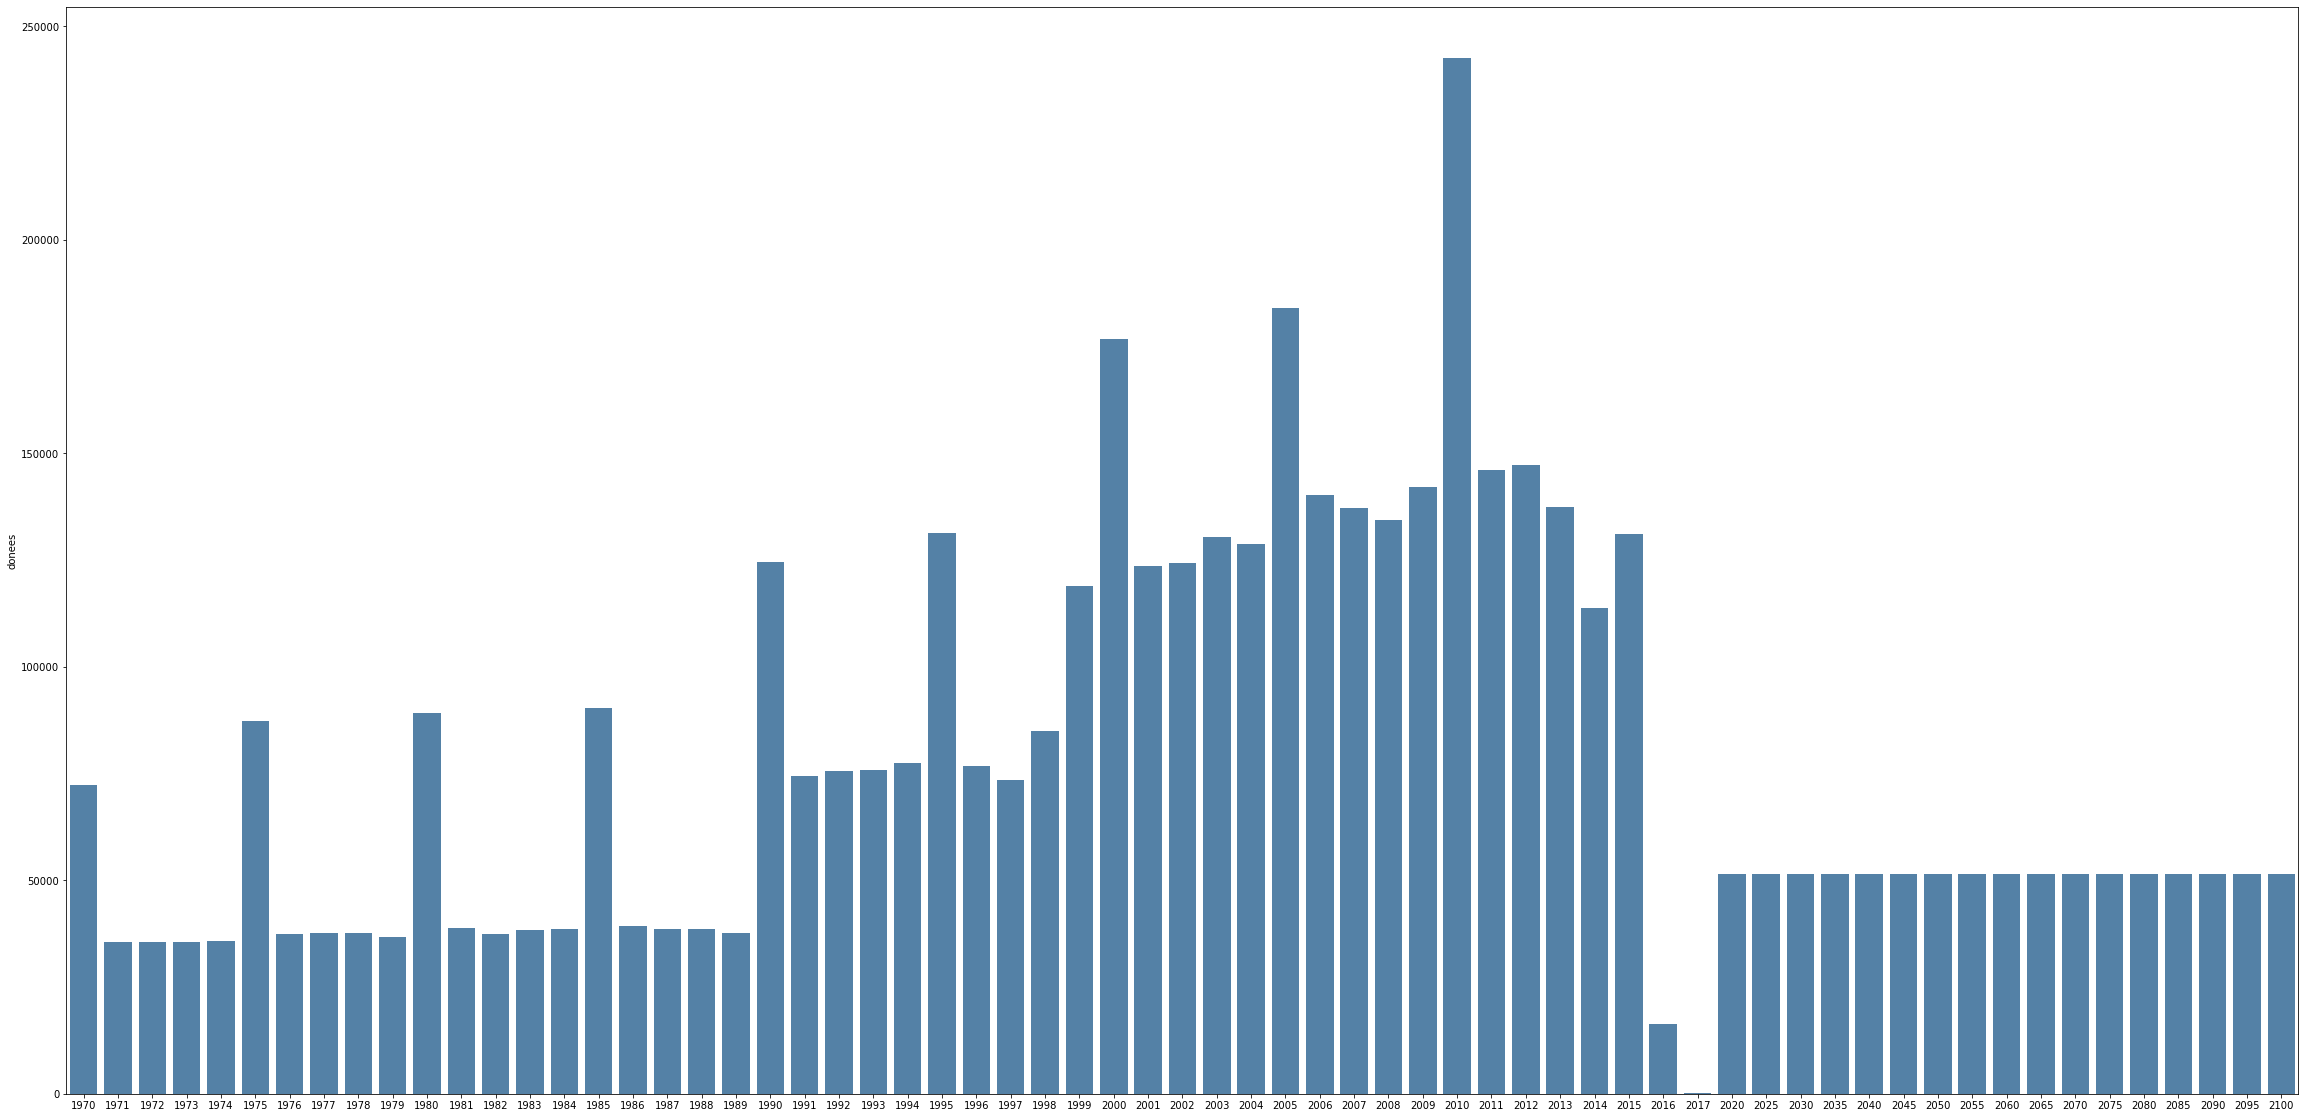

In [232]:
plt.figure(figsize=(40, 20))
axy = sns.barplot(y = a['donees'], x=a.index, color='SteelBlue')


On peut bien observer un pic de données tous les 5 ans. Les données sont doublées tous les 10 ans à partir de 1990. Le plus actuel data est l'annee 2016. Les années 2020 à 2100 sont des années pour prédiction. L'année 2010 est l'annee avec le plus de données.


<a class="anchor" id="section_7_3"></a>Conclusion

<a class="anchor" id="chapter8"></a>Des indicateurs pertinants

In [233]:
cols_annees=df_EdStatsData.columns[44:-20].tolist()

In [234]:
cols_annees

['2010', '2011', '2012', '2013', '2014', '2015']

<a class="anchor" id="section_7_1"></a>Taux de remplissage des indicateurs

In [235]:
df_taux_indicateurs = df_EdStatsData.copy()

# Compte le nombre de chaque indicateur par année
df_taux_indicateurs = df_taux_indicateurs.groupby('Indicator Code')[cols_annees].count()
df_taux_indicateurs=df_taux_indicateurs.reset_index()
# La variable 'TOT' est le nombre de données par indicateur pour tous les pays pour toutes les années.
df_taux_indicateurs['TOT']=df_taux_indicateurs[cols_annees].sum(axis=1)
# La variable '%' est le taux de remplissage de chaque indicateur pour tous les pays pour toutes les années.
# Chaque indicateur peut être associé à 242 pays pour chaque année (6 années) : 242*6=1452
df_taux_indicateurs['%']=round((df_taux_indicateurs['TOT'])*100/1452,2)

df_indic_reduit=df_taux_indicateurs[df_taux_indicateurs['%']>50]
print(f'Indicateurs restants : {df_indic_reduit.shape[0]}')

Indicateurs restants : 423


In [236]:
# On ajout du nom court de l'indicateur pour plus de info
df_work_indic=df_EdStatsSeries[['Series Code', 'Indicator Name','Topic','Long definition']]
df_work_indic.drop_duplicates(inplace=True)
pd.set_option('max_colwidth', None)

C:\Users\utilisateur\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [237]:
df_indic_reduit = pd.merge(df_indic_reduit, df_work_indic, how='left', left_on='Indicator Code', right_on='Series Code')
df_indic_reduit.drop(columns=['Series Code'],inplace=True)

In [238]:
# Cible : lycéens 15-19 ans
pd.set_option('max_colwidth', None)
liste_mot_cle_15=[row for row in df_indic_reduit['Indicator Code'] if ('15') in row]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_mot_cle_15)][['Indicator Code','Indicator Name','Topic','Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
160,SP.POP.1015.FE.UN,"Population, ages 10-15, female",Population,"Population, ages 10-15, female is the total number of females age 10-15."
161,SP.POP.1015.MA.UN,"Population, ages 10-15, male",Population,"Population, ages 10-15, male is the total number of males age 10-15."
162,SP.POP.1015.TO.UN,"Population, ages 10-15, total",Population,"Population, ages 10-15, total is the total population age 10-15."
172,SP.POP.1115.FE.UN,"Population, ages 11-15, female",Population,"Population, ages 11-15, female is the total number of females age 11-15."
173,SP.POP.1115.MA.UN,"Population, ages 11-15, male",Population,"Population, ages 11-15, male is the total number of males age 11-15."
174,SP.POP.1115.TO.UN,"Population, ages 11-15, total",Population,"Population, ages 11-15, total is the total population age 11-15."
184,SP.POP.1215.FE.UN,"Population, ages 12-15, female",Population,"Population, ages 12-15, female is the total number of females age 12-15."
185,SP.POP.1215.MA.UN,"Population, ages 12-15, male",Population,"Population, ages 12-15, male is the total number of males age 12-15."
186,SP.POP.1215.TO.UN,"Population, ages 12-15, total",Population,"Population, ages 12-15, total is the total population age 12-15."
214,SP.POP.1524.FE.UN,"Population, ages 15-24, female",Population,"Population, ages 15-24, female is the total number of females age 15-24."


In [239]:
# Cible : universitaires 20-24 ans
liste_mot_cle_20=[row for row in df_indic_reduit['Indicator Code'] if ('20') in row]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_mot_cle_20)][['Indicator Code','Indicator Name','Topic','Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
281,SP.POP.AG20.FE.UN,"Age population, age 20, female, UNESCO",Population,"Age population, female refers to female population at the specified age level, as estimated by the UNESCO Institute for Statistics."
282,SP.POP.AG20.MA.UN,"Population, age 20, male",Population,"Population, age 20, male refers to the male population at the specified age."
283,SP.POP.AG20.TO.UN,"Age population, age 20, total, UNESCO",Population,"Age population, total refers to total population at the specified age level, as estimated by the UNESCO Institute for Statistics."


In [240]:
# Cible : éducation lycée
liste_mot_cle_sec=[row for row in df_indic_reduit['Indicator Code'] if ('SEC') in row ]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_mot_cle_sec)][['Indicator Code','Indicator Name','Topic','Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
16,SE.ENR.SECO.FM.ZS,"Gross enrolment ratio, secondary, gender parity index (GPI)",Secondary,"Ratio of female gross enrolment ratio for secondary to male gross enrolment ratio for secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females."
63,SE.SEC.AGES,Official entrance age to lower secondary education (years),Secondary,"Age at which students would enter lower secondary education, assuming they had started at the official entrance age for the lowest level of education, had studied full-time throughout and had progressed through the system without repeating or skipping a grade."
64,SE.SEC.CMPT.LO.FE.ZS,"Lower secondary completion rate, female (%)",Secondary,"Total number of new female entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total female population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
65,SE.SEC.CMPT.LO.MA.ZS,"Lower secondary completion rate, male (%)",Secondary,"Total number of new male entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total male population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
66,SE.SEC.CMPT.LO.ZS,"Lower secondary completion rate, both sexes (%)",Secondary,"Total number of new entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
67,SE.SEC.DURS,Theoretical duration of secondary education (years),Secondary,Number of grades (years) in secondary education (ISCED 2 and 3).
68,SE.SEC.DURS.LO,NaN,NaN,NaN
69,SE.SEC.DURS.UP,Theoretical duration of upper secondary education (years),Secondary,Number of grades (years) in upper secondary education.
70,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (number)",Secondary,Total number of students enrolled at public and private secondary education institutions regardless of age.
71,SE.SEC.ENRL.FE,"Enrolment in secondary education, female (number)",Secondary,Total number of female students enrolled at public and private secondary education institutions regardless of age.


In [241]:
# Cible : éducation enseignement supérieur
liste_mot_cle_ter=[row for row in df_indic_reduit['Indicator Code'] if ('TER') in row ]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_mot_cle_ter)][['Indicator Code','Indicator Name','Topic','Long definition']]


,Indicator Code,Indicator Name,Topic,Long definition
17,SE.ENR.TERT.FM.ZS,"Gross enrolment ratio, tertiary, gender parity index (GPI)",Tertiary,"Ratio of female gross enrolment ratio for tertiary to male gross enrolment ratio for tertiary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females."
97,SE.TER.ENRL,"Enrolment in tertiary education, all programmes, both sexes (number)",Tertiary,The total number of students enrolled at public and private tertiary education institutions.
98,SE.TER.ENRL.FE,"Enrolment in tertiary education, all programmes, female (number)",Tertiary,The total number of female students enrolled at public and private tertiary education institutions.
99,SE.TER.ENRL.FE.ZS,Percentage of students in tertiary education who are female (%),Tertiary,Number of female students at the tertiary education level (ISCED 5 to 8) expressed as a percentage of the total number of students (male and female) at the tertiary education level (ISCED 5 to 8) in a given school year.
100,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",Tertiary,"Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving."
101,SE.TER.ENRR.FE,"Gross enrolment ratio, tertiary, female (%)",Tertiary,"Total female enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total female population of the five-year age group following on from secondary school leaving."
102,SE.TER.ENRR.MA,"Gross enrolment ratio, tertiary, male (%)",Tertiary,"Total male enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total male population of the five-year age group following on from secondary school leaving."
323,SP.TER.TOTL.FE.IN,"Population of the official age for tertiary education, female (number)",Population,Female population of the age-group theoretically corresponding to tertiary education as indicated by theoretical entrance age and duration.
324,SP.TER.TOTL.IN,"Population of the official age for tertiary education, both sexes (number)",Population,Population of the age-group theoretically corresponding to tertiary education as indicated by theoretical entrance age and duration.
325,SP.TER.TOTL.MA.IN,"Population of the official age for tertiary education, male (number)",Population,Male population of the age-group theoretically corresponding to tertiary education as indicated by theoretical entrance age and duration.


In [242]:
# Cible : moyen de communication internet
liste_mot_cle_it=[row for row in df_indic_reduit['Indicator Code'] if ('IT') in row ]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_mot_cle_it)][['Indicator Code','Indicator Name','Topic','Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
0,IT.NET.USER.P2,Internet users (per 100 people),Infrastructure: Communications,"Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc."


In [243]:
# Cible : énergie, accès à l'éléctricité
liste_mot_cle_ene=[row for row in df_indic_reduit['Indicator Code'] if ('EG') in row ]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_mot_cle_ene)][['Indicator Code','Indicator Name','Topic','Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition


In [244]:
# Cible : économie
liste_mot_cle_eco=[row for row in df_indic_reduit['Indicator Code'] if ('NY') in row ]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_mot_cle_eco)][['Indicator Code','Indicator Name','Topic','Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
1,NY.GDP.MKTP.CD,GDP (current US$),Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used."
2,NY.GDP.MKTP.KD,GDP (constant 2010 US$),Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators,"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2010 U.S. dollars. Dollar figures for GDP are converted from domestic currencies using 2010 official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used."
3,NY.GDP.MKTP.PP.CD,"GDP, PPP (current international $)",Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current international dollars. For most economies PPP figures are extrapolated from the 2011 International Comparison Program (ICP) benchmark estimates or imputed using a statistical model based on the 2011 ICP. For 47 high- and upper middle-income economies conversion factors are provided by Eurostat and the Organisation for Economic Co-operation and Development (OECD).
4,NY.GDP.MKTP.PP.KD,"GDP, PPP (constant 2011 international $)",Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2011 international dollars.
5,NY.GDP.PCAP.CD,GDP per capita (current US$),Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.
6,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators,GDP per capita is gross 

In [245]:
# Taux de remplissage sur 2010-2015
indicateurs_retenus=['SP.POP.1524.TO.UN', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD']


In [246]:
mask=df_indic_reduit['Indicator Code'].isin(indicateurs_retenus)
mask

0       True
1      False
2      False
3      False
4      False
       ...  
418    False
419    False
420    False
421    False
422    False
Name: Indicator Code, Length: 423, dtype: bool

In [247]:
cols=['Indicator Code','Indicator Name','%']
cols


['Indicator Code', 'Indicator Name', '%']

In [248]:
df_indic_reduit[cols][mask]

,Indicator Code,Indicator Name,%
0,IT.NET.USER.P2,Internet users (per 100 people),93.32
12,NY.GNP.PCAP.PP.CD,"GNI per capita, PPP (current international $)",86.50
83,SE.SEC.ENRR,"Gross enrolment ratio, secondary, both sexes (%)",66.05
100,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",60.74
216,SP.POP.1524.TO.UN,"Population, ages 15-24, total",74.79


In [249]:
df_data_netto = df_EdStatsData.copy()

In [250]:
df_data_netto

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,54.82212,54.89414,56.20944,57.26711,57.99114,59.36554,60.99996,61.92268,62.69342,64.38319,65.61777,66.08515,66.60814,67.29045,68.51009,69.03321,69.94491,71.04187,71.69378,71.6991,71.99582,72.60284,70.03272,70.46482,72.64568,71.81176,73.90351,74.4252,75.11082,76.25432,77.24568,78.80052,80.0514,80.80539,81.60706,82.48949,82.68551,83.28034,84.01187,84.19596,85.212,85.24514,86.10167,85.51194,85.32015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male (number)",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, both sexes (%)",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.02185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.41136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.42812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, female (%)",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.81224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.35344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.18835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, gender parity index (GPI)",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9

In [251]:
#Il faut supprimer le colonne Unnamed:69
df_data_netto.drop(columns=['Unnamed: 69'],inplace=True)
df_data_netto.shape

(886930, 69)

In [252]:
#La decennie 2010 est la plus fournie en données sur la période 2010-2015. Donc on va garder entre les annees 2010 et 2015
cols_a_supr=df_EdStatsData.columns[4:44].to_list()
cols_a_supr.extend(df_EdStatsData.columns[50:-1].to_list())
df_data_netto.drop(columns=cols_a_supr,inplace=True)

In [253]:
# Liste des indicateurs pertinents à garder
indic_a_garder=['SP.POP.1524.TO.UN','SE.SEC.ENRR','SE.TER.ENRR','IT.NET.USER.P2','IT.CMP.PCMP.P2','NY.GNP.PCAP.PP.CD']
# On ne conserve que les lignes donnant des informations sur les indicateurs retenus
df_data_netto=df_data_netto[df_data_netto['Indicator Code'].isin(indic_a_garder)]


In [254]:
df_data_netto.shape

(1452, 10)

In [255]:
df_data_netto.dropna(thresh = 5, inplace=True)

C:\Users\utilisateur\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [256]:
df_data_netto.shape

(1016, 10)

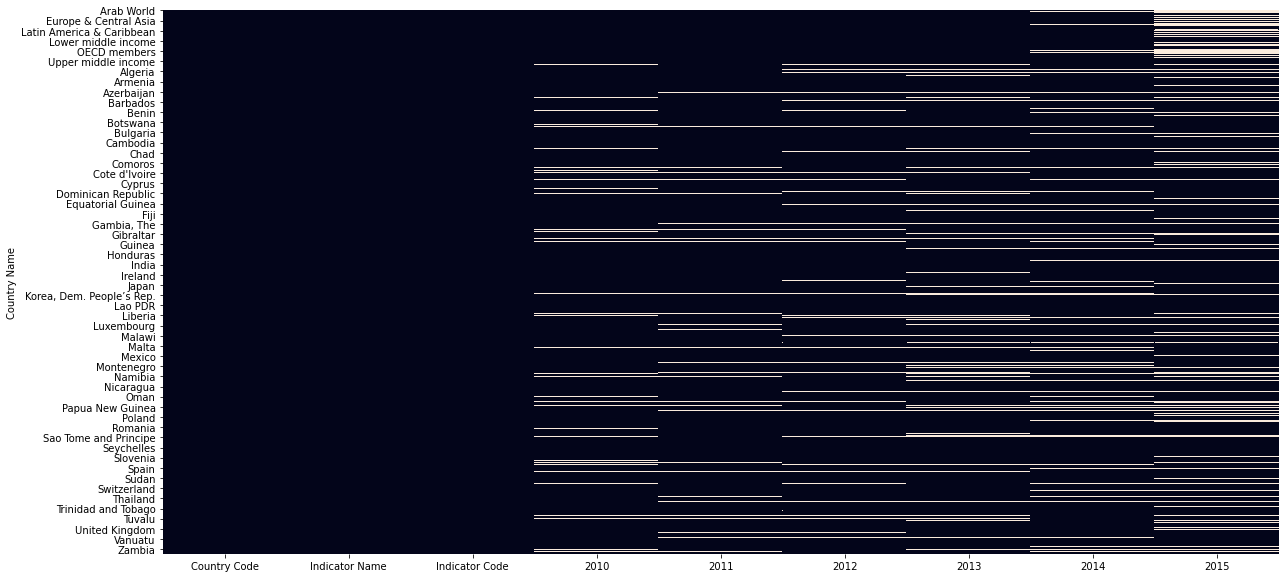

In [257]:
plt.figure(figsize=(20,10))
df_x=df_data_netto.set_index('Country Name')
sns.heatmap(df_x.isna(), cbar=False)
plt.show()  

In [258]:
# Variable 'Region' et 'Income Group' du jeu de données EdStatsCountry.csv en supprimant les données dupliquées
countries_income = pd.DataFrame({'Country_Code' : df_EdStatsCountry['Country Code'].unique(), 
                                 'Region' : df_EdStatsCountry['Region'], 
                                 'Income Group' : df_EdStatsCountry['Income Group']})
df_data_netto = pd.merge(df_data_netto,countries_income, left_on='Country Code', right_on='Country_Code', how='left')
df_data_netto.drop(columns=['Country_Code'],inplace=True)
df_data_netto.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2010', '2011', '2012', '2013', '2014', '2015', 'Region',
       'Income Group'],
      dtype='object')

In [259]:
#Les NaNs dans "Region"
df_data_netto['Region'].unique()

array(['Other', 'South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'East Asia & Pacific',
       'North America', nan], dtype=object)

In [260]:
df_data_netto

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Region,Income Group
0,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.42840e+04,1.49962e+04,1.58465e+04,1.61416e+04,NaN,NaN,Other,Other
1,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,6.80509e+01,7.06915e+01,7.17166e+01,7.02747e+01,7.07350e+01,NaN,Other,Other
2,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,2.47618e+01,2.42739e+01,2.57760e+01,2.73303e+01,2.81750e+01,NaN,Other,Other
3,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,2.67473e+01,2.97078e+01,3.40142e+01,3.68686e+01,NaN,NaN,Other,Other
4,East Asia & Pacific,EAS,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.17387e+04,1.26011e+04,1.35000e+04,1.43891e+04,1.53305e+04,1.61499e+04,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
1011,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.24000e+03,1.39000e+03,1.61000e+03,1.75000e+03,1.79000e+03,1.79000e+03,Sub-Saharan Africa,Low income
1012,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,4.66732e+01,4.75702e+01,NaN,NaN,Sub-Saharan Africa,Low income
1013,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,5.90560e+00,5.82376e+00,5.86867e+00,5.87175e+00,NaN,8.43327e+00,Sub-Saharan Africa,Low income
1014,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,6.40000e+00,8.40000e+00,1.20000e+01,1.55000e+01,1.63647e+01,2.27428e+01,Sub-Saharan Africa,Low income


In [261]:
df_data_netto[df_data_netto['Region'].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Region,Income Group
217,British Virgin Islands,VGB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,101.6024,96.24625,97.60359,98.3093,97.73733,98.73356,NaN,NaN
218,British Virgin Islands,VGB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,41.64149,NaN,NaN


In [262]:
#J'ai cherché sur Google pour voir dans quelle région se trouve et c'est "Caribbean". Donc on va remplacer avec ca.
df_data_netto.loc[[217, 218], 'Region'] = ['Caribbean', 'Caribbean']

In [263]:
df_data_netto[df_data_netto['Region'].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Region,Income Group


In [264]:
#Les NaNs dans "Income Group"
df_data_netto['Income Group'].unique()

array(['Other', 'Low income', 'Upper middle income',
       'High income: nonOECD', 'Lower middle income', 'High income: OECD',
       nan], dtype=object)

In [265]:
df_data_netto[df_data_netto['Income Group'].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Region,Income Group
217,British Virgin Islands,VGB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,101.6024,96.24625,97.60359,98.3093,97.73733,98.73356,Caribbean,NaN
218,British Virgin Islands,VGB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,41.64149,Caribbean,NaN


In [266]:
#J'ai cherché sur Google pour voir "British Virgin Islands" existe dans les pays de l'OECD ou pas et 
#c'est une pays non OECD. Donc on va remplacer ca aussi.
df_data_netto.loc[[217, 218], 'Income Group'] = ['High income: nonOECD', 'High income: nonOECD']

In [267]:
df_data_netto[df_data_netto['Income Group'].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Region,Income Group


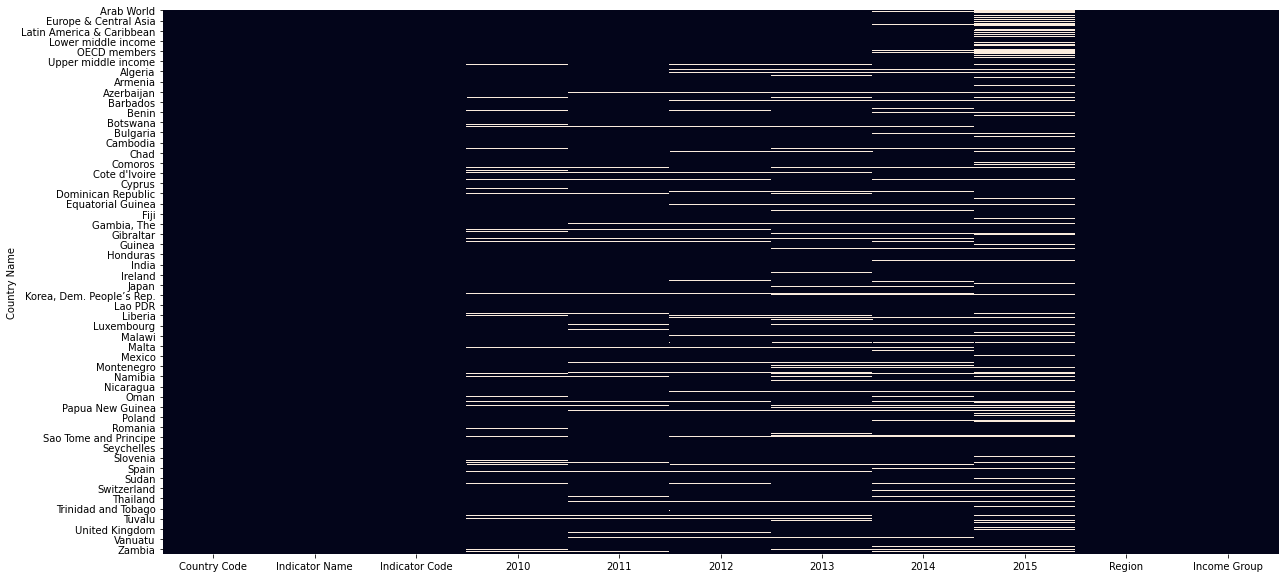

In [268]:
plt.figure(figsize=(20,10))
df_x=df_data_netto.set_index('Country Name')
sns.heatmap(df_x.isna(), cbar=False)
plt.show()  

<a class="anchor" id="chapter9"></a>Analyze des indicateurs

In [269]:
df_data_netto

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Region,Income Group
0,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.42840e+04,1.49962e+04,1.58465e+04,1.61416e+04,NaN,NaN,Other,Other
1,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,6.80509e+01,7.06915e+01,7.17166e+01,7.02747e+01,7.07350e+01,NaN,Other,Other
2,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,2.47618e+01,2.42739e+01,2.57760e+01,2.73303e+01,2.81750e+01,NaN,Other,Other
3,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,2.67473e+01,2.97078e+01,3.40142e+01,3.68686e+01,NaN,NaN,Other,Other
4,East Asia & Pacific,EAS,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.17387e+04,1.26011e+04,1.35000e+04,1.43891e+04,1.53305e+04,1.61499e+04,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
1011,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.24000e+03,1.39000e+03,1.61000e+03,1.75000e+03,1.79000e+03,1.79000e+03,Sub-Saharan Africa,Low income
1012,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,4.66732e+01,4.75702e+01,NaN,NaN,Sub-Saharan Africa,Low income
1013,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,5.90560e+00,5.82376e+00,5.86867e+00,5.87175e+00,NaN,8.43327e+00,Sub-Saharan Africa,Low income
1014,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,6.40000e+00,8.40000e+00,1.20000e+01,1.55000e+01,1.63647e+01,2.27428e+01,Sub-Saharan Africa,Low income


In [270]:
#Le date plus recent est 2015, donc on va garder que ca.
df_2015 = df_data_netto[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Region', 'Income Group', '2015']].copy()
df_2015.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
Region              0
Income Group        0
2015              179
dtype: int64

In [271]:
df_2015a = df_2015.copy()
df_2015a = df_2015a.dropna()

In [272]:
df_2015a.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Region            0
Income Group      0
2015              0
dtype: int64

In [273]:
# Indicateur population : SP.POP.1524.TO.UN

df_pop=df_2015a[df_2015a['Indicator Code'] == 'SP.POP.1524.TO.UN']
df_pop.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Region            0
Income Group      0
2015              0
dtype: int64

In [274]:
mean_pop=df_pop['2015'].mean()
mean_pop

6654994.635359116

In [275]:
# Indicateur économique : NY.GNP.PCAP.PP.CD
df_eco=df_2015a[df_2015a['Indicator Code'] == 'NY.GNP.PCAP.PP.CD']
df_eco.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Region            0
Income Group      0
2015              0
dtype: int64

In [276]:
df_eco['2015'].mean()

18790.928699067077

In [277]:
# Indicateur éducatif lycée : SE.SEC.ENRR
df_edu_lycee=df_2015a[df_2015a['Indicator Code'] == 'SE.SEC.ENRR']
df_edu_lycee.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Region            0
Income Group      0
2015              0
dtype: int64

In [278]:
# Indicateur éducatif scolarisation dans l'enseignement supérieur : SE.TER.ENRR
df_edu_sup=df_2015a[df_2015a['Indicator Code'] == 'SE.TER.ENRR']
df_edu_sup.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Region            0
Income Group      0
2015              0
dtype: int64

In [279]:
# Indicateur internet : IT.NET.USER.P2
df_inter = df_2015a[df_2015a['Indicator Code'] == 'IT.NET.USER.P2']
df_inter.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Region            0
Income Group      0
2015              0
dtype: int64

In [280]:
df_inter['2015'].mean()

48.21018337383612

<a class="anchor" id="chapter10"></a>Imputation des valeurs manquantes

In [281]:
df_imput=df_data_netto.copy()
cols_to_imput=df_imput.columns[4:-2].tolist()
#  Variables quantitatives
df_numeric = df_imput[cols_to_imput]
# Variables qualitatives
df_categ = df_imput.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Income Group', 'Region']]
df_numeric.interpolate(method='linear', axis=1, inplace=True)
df_pays_all = pd.concat([df_categ, df_numeric], axis=1)
nb_pays=df_pays_all['Country Name'].nunique()
print(f'nombre de pays : {nb_pays}')

nombre de pays : 235


C:\Users\utilisateur\anaconda3\lib\site-packages\pandas\core\frame.py:10720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs,


In [282]:
# on ne conserve que les 5 indicateurs avec, pour chaque indicateur et pays, la dernière information réelle ou interpolée de 2015
df_score= df_pays_all.pivot_table(index=['Country Name'], columns="Indicator Code")['2015']
df_score.shape

(235, 5)

In [283]:
df_score

Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Name,,,,,
Afghanistan,8.26000,1880.00000,55.64441,8.66280,7252785.0
Albania,63.25293,11340.00000,95.76549,58.10995,556269.0
Algeria,38.20000,14170.00000,99.86019,36.92228,6467818.0
Andorra,96.91000,NaN,NaN,NaN,NaN
Angola,12.40000,6270.00000,28.89872,9.30802,4259352.0
...,...,...,...,...,...
West Bank and Gaza,57.42419,NaN,82.99623,44.28322,1053004.0
World,43.19846,15699.29841,76.42307,35.69256,NaN
"Yemen, Rep.",24.08541,2720.00000,48.62466,9.97460,5995687.0


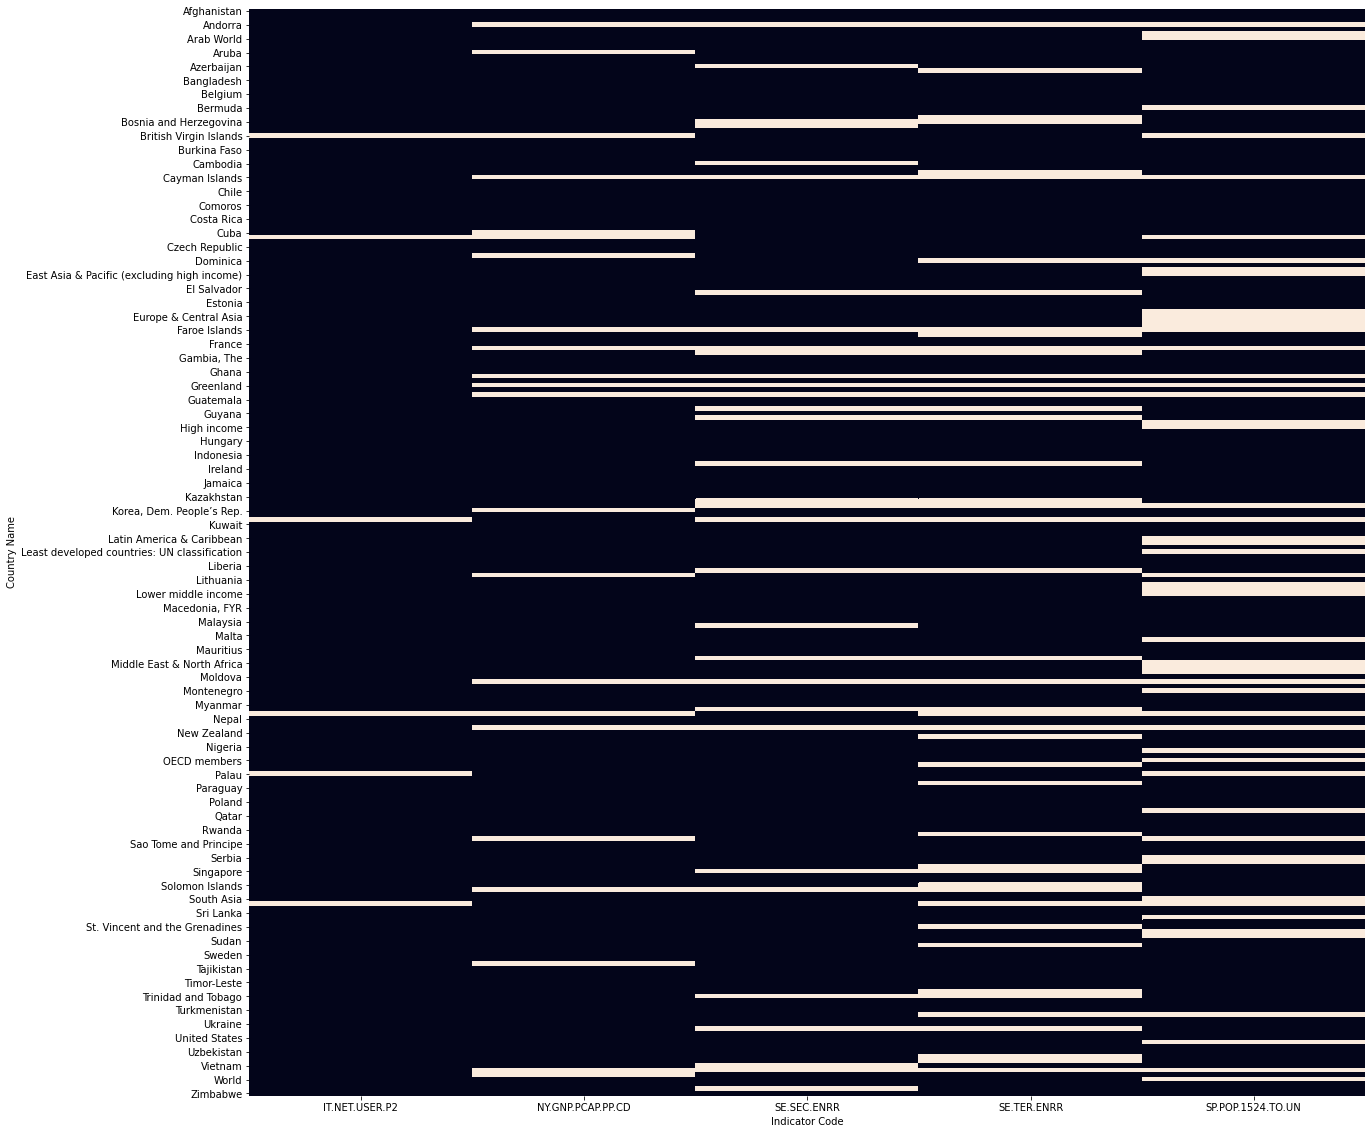

In [284]:
plt.figure(figsize=(20,20))
sns.heatmap(df_score.isna(), cbar=False)
plt.show()  

<a class="anchor" id="chapter11"></a>Statistiques Descriptives

In [285]:
# Statistiques descriptives
mean_int=df_inter['2015'].mean()
mean_eco=df_eco['2015'].mean()
mean_edu_sec=df_edu_lycee['2015'].mean()
mean_edu_ter=df_edu_sup['2015'].mean()
mean_pop=df_pop['2015'].mean()

median_int=df_inter['2015'].median()
median_eco=df_eco['2015'].median()
median_edu_sec=df_edu_lycee['2015'].median()
median_edu_ter=df_edu_sup['2015'].median()
median_pop=df_pop['2015'].median()

data_stats = [['mean',mean_int, mean_eco, mean_edu_sec, mean_edu_ter, mean_pop],
        ['median', median_int, median_eco, median_edu_sec,median_edu_ter,median_pop],]
df_stat = pd.DataFrame(data_stats,columns=['Desc','Stat_int','Stat_eco','Stat_edu_s','Stat_edu_ter','Stat_pop'])
df_stat

,Desc,Stat_int,Stat_eco,Stat_edu_s,Stat_edu_ter,Stat_pop
0,mean,48.21018,18790.9287,85.50061,44.40308,6.65499e+06
1,median,48.94043,12120.0000,91.75640,43.32750,1.33104e+06


In [286]:
# Liste des pays avec au moins un indicateur manquant
s_pays_indic_manquant=df_score.notnull().sum(axis=1)
i_pays_indic_manquant=s_pays_indic_manquant[s_pays_indic_manquant<5].index
print(f'Nombre de pays à supprimer : {len(i_pays_indic_manquant)}')
df_pays_retires=df_score.loc[i_pays_indic_manquant, :].sort_values(by='SP.POP.1524.TO.UN', ascending=False)
df_pays_retires

Nombre de pays à supprimer : 95


Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Name,,,,,
Vietnam,43.50000,5740.00000,NaN,28.83565,16939813.0
Kenya,21.00000,2990.00000,NaN,NaN,8902971.0
Iraq,17.22000,15810.00000,NaN,NaN,7340940.0
"Venezuela, RB",61.86925,17440.00000,89.66401,NaN,5479911.0
Syrian Arab Republic,29.97980,NaN,50.48922,44.04862,4400418.0
Canada,88.47000,43530.00000,109.93155,NaN,4373511.0
"Korea, Dem. People’s Rep.",0.00000,NaN,93.39609,28.05944,4023348.0
Cambodia,19.00000,3300.00000,NaN,13.08826,3502594.0
Zambia,21.00000,3810.00000,NaN,3.98141,3068044.0


<a class="anchor" id="section_11_1"></a>Conclusion

<a class="anchor" id="chapter12"></a>Scale

In [287]:
df_score.dropna(inplace=True)

In [288]:
df_score.isna().sum()

Indicator Code
IT.NET.USER.P2       0
NY.GNP.PCAP.PP.CD    0
SE.SEC.ENRR          0
SE.TER.ENRR          0
SP.POP.1524.TO.UN    0
dtype: int64

In [289]:
print(f'Nombre de pays restant : {df_score.shape[0]}')

Nombre de pays restant : 140


In [290]:
cols = ['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']

In [291]:
scaler_pow = PowerTransformer(method = 'box-cox')
df_score_scaled = scaler_pow.fit_transform(df_score[cols])
df_score_scaled = pd.DataFrame(df_score_scaled, columns=cols)

<a class="anchor" id="section_12_1"></a>Density Plot

<Figure size 1440x720 with 0 Axes>

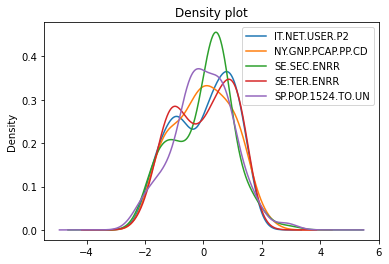

In [292]:
plt.figure(figsize=(20, 10))
df_score_scaled.plot.density()
plt.title('Density plot')
plt.show()

<a class="anchor" id="chapter13"></a>Score

In [293]:
## Calcul du score pour chaque pays en fonction des pondérations de chaque indicateur
#  internet, economique, education et population
df_score_scaled['Country Name'] = df_score.index
df_score_scaled['Score']=[(row[0] *3 + row[1] *4 + row[2] *4 + row[3] *2 + row[4]*1) for row in zip(df_score_scaled['SP.POP.1524.TO.UN'], df_score_scaled['NY.GNP.PCAP.PP.CD'], df_score_scaled['SE.SEC.ENRR'], df_score_scaled['SE.TER.ENRR'], df_score_scaled['IT.NET.USER.P2'])]
df_score_scaled.sort_values(by='Score',ascending=False)

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,Country Name,Score
12,1.19764,1.22572,2.93822,1.12251,-0.17994,Belgium,19.55862
6,1.18417,1.22293,1.85980,1.43348,0.29829,Australia,17.27694
135,0.90469,1.46207,0.43800,1.34503,1.87674,United States,16.82528
95,1.37776,1.31094,1.78385,1.19607,0.08806,Netherlands,16.41326
44,1.23497,1.15904,2.29477,1.37462,-0.54790,Finland,16.15574
134,1.38512,1.12602,1.50695,0.69000,0.85279,United Kingdom,15.85536
117,1.02157,0.96391,1.57898,1.42116,0.51646,Spain,15.58481
122,1.34798,1.28663,1.96519,0.83360,-0.23016,Sweden,15.33202
36,1.49968,1.32771,1.61558,1.28452,-0.49007,Denmark,14.37164
48,1.26665,1.29674,0.61535,0.97280,0.91926,Germany,13.61839


In [294]:
df_score_scaled2=df_score_scaled.copy()

In [295]:
df_score_scaled2['Country Name'] = df_score.index
df_score_scaled2['Score']=[(row[0] *15 + row[1] *20 + row[2] *20 + row[3] *10 + row[4]*5) for row in zip(df_score_scaled['SP.POP.1524.TO.UN'], df_score_scaled2['NY.GNP.PCAP.PP.CD'], df_score_scaled2['SE.SEC.ENRR'], df_score_scaled2['SE.TER.ENRR'], df_score_scaled2['IT.NET.USER.P2'])]
df_score_scaled2.sort_values(by='Score',ascending=False)

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,Country Name,Score
12,1.19764,1.22572,2.93822,1.12251,-0.17994,Belgium,97.79309
6,1.18417,1.22293,1.85980,1.43348,0.29829,Australia,86.38469
135,0.90469,1.46207,0.43800,1.34503,1.87674,United States,84.12638
95,1.37776,1.31094,1.78385,1.19607,0.08806,Netherlands,82.06630
44,1.23497,1.15904,2.29477,1.37462,-0.54790,Finland,80.77872
134,1.38512,1.12602,1.50695,0.69000,0.85279,United Kingdom,79.27679
117,1.02157,0.96391,1.57898,1.42116,0.51646,Spain,77.92403
122,1.34798,1.28663,1.96519,0.83360,-0.23016,Sweden,76.66008
36,1.49968,1.32771,1.61558,1.28452,-0.49007,Denmark,71.85819
48,1.26665,1.29674,0.61535,0.97280,0.91926,Germany,68.09195


In [296]:
df_score_pays = df_score_scaled2[['Country Name', 'Score']]
df_score_pays.sort_values(by='Score',ascending=False)

,Country Name,Score
12,Belgium,97.79309
6,Australia,86.38469
135,United States,84.12638
95,Netherlands,82.06630
44,Finland,80.77872
134,United Kingdom,79.27679
117,Spain,77.92403
122,Sweden,76.66008
36,Denmark,71.85819
48,Germany,68.09195


In [297]:
#On va ajouter la région et du groupe de revenus
region_income = pd.DataFrame({'Country_Name' : df_data_netto['Country Name'],
                              'Region' : df_data_netto['Region'], 'Income Group' : df_data_netto['Income Group']})
df_score_scaled_r = pd.merge(df_score_scaled2, region_income, left_on='Country Name', right_on='Country_Name', how='inner')


df_score_scaled_r.drop(columns=['Country_Name'], inplace=True)
df_score_scaled_r.drop_duplicates(inplace=True)
df_score_scaled_r.sort_values(by='Score', ascending=False).head(10)

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,Country Name,Score,Region,Income Group
60,1.19764,1.22572,2.93822,1.12251,-0.17994,Belgium,97.79309,Europe & Central Asia,High income: OECD
30,1.18417,1.22293,1.85980,1.43348,0.29829,Australia,86.38469,East Asia & Pacific,High income: OECD
675,0.90469,1.46207,0.43800,1.34503,1.87674,United States,84.12638,North America,High income: OECD
475,1.37776,1.31094,1.78385,1.19607,0.08806,Netherlands,82.06630,Europe & Central Asia,High income: OECD
220,1.23497,1.15904,2.29477,1.37462,-0.54790,Finland,80.77872,Europe & Central Asia,High income: OECD
670,1.38512,1.12602,1.50695,0.69000,0.85279,United Kingdom,79.27679,Europe & Central Asia,High income: OECD
585,1.02157,0.96391,1.57898,1.42116,0.51646,Spain,77.92403,Europe & Central Asia,High income: OECD
610,1.34798,1.28663,1.96519,0.83360,-0.23016,Sweden,76.66008,Europe & Central Asia,High income: OECD
180,1.49968,1.32771,1.61558,1.28452,-0.49007,Denmark,71.85819,Europe & Central Asia,High income: OECD
240,1.26665,1.29674,0.61535,0.97280,0.91926,Germany,68.09195,Europe & Central Asia,High income: OECD


In [298]:
#On va creer du dataframe du regropement par pays
df_score_region = df_score_scaled_r.groupby('Region').mean()
df_score_region = df_score_region.rename(columns={'IT.NET.USER.P2':'Internet', 'NY.GNP.PCAP.PP.CD':'Economic', 'SE.SEC.ENRR':'Edu_Sec', 'SE.TER.ENRR':'Edu_Ter', 'SP.POP.1524.TO.UN':'Population'})
df_score_region = df_score_region.sort_values(by='Score', ascending=False)

<a class="anchor" id="section_13_1"></a>Score de region

In [299]:
df_score_region

,Internet,Economic,Edu_Sec,Edu_Ter,Population,Score
Region,,,,,,
North America,0.90469,1.46207,0.43800,1.34503,1.87674,84.12638
Europe & Central Asia,0.76737,0.66647,0.82798,0.78996,-0.26329,37.67610
East Asia & Pacific,0.29666,0.52234,0.32792,0.39441,0.27849,26.60984
Middle East & North Africa,0.50941,0.54127,0.08401,0.15457,-0.06950,15.55584
Latin America & Caribbean,0.13443,0.04329,0.21362,0.26357,-0.27345,4.34442
South Asia,-0.91570,-0.69538,-0.49247,-0.80564,0.99314,-21.49480
Sub-Saharan Africa,-1.16109,-1.15577,-1.19813,-1.20198,0.13556,-62.86981


<a class="anchor" id="section_13_1_1"></a>Graphique

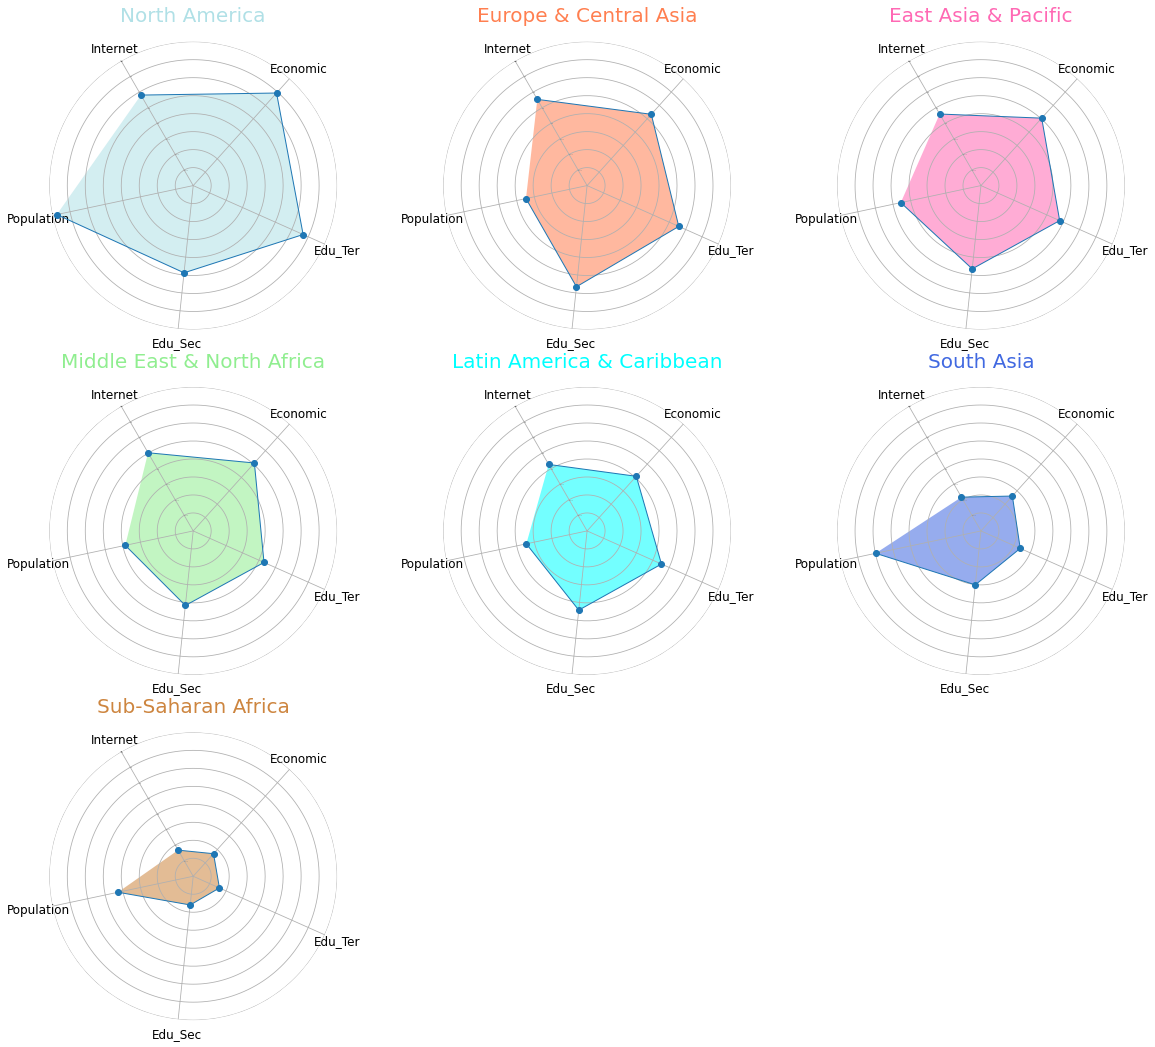

In [300]:
#On va creer les graphiques
df_graph = df_score_region[['Internet', 'Economic', 'Edu_Ter', 'Edu_Sec','Population']]

#Nombres des variables
category = list(df_graph.columns)

N= len(category)

angles = [n/float(N) *2 * pi for n in range(N)]

fig=plt.figure(1, figsize=(20,18))

colors = ['PowderBlue', 'Coral', 'HotPink', 'LightGreen', 'Cyan', 'RoyalBlue','Peru']

for i, region in enumerate(df_graph.index) : 
    
    ax = fig.add_subplot(3,3,i+1, polar=True)

    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, category, size=8)
    plt.yticks(color="grey", size=2)
    values=df_graph.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(category, fontsize=12)
    ax.set_title(region, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(-2,2)

plt.show()

<a class="anchor" id="section_13_1_2"></a>

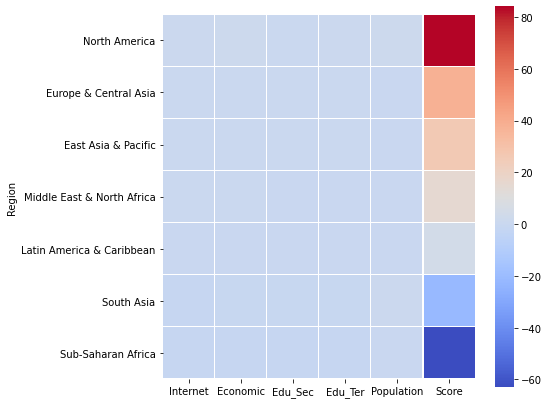

In [301]:
fig = plt.figure(1, figsize=(7,7))
region_graph = sns.heatmap(df_score_region, square=True, linewidths=0.1, cmap='coolwarm')
region_graph.set_yticklabels(region_graph.get_ymajorticklabels())
region_graph.set_xticklabels(region_graph.get_xmajorticklabels())
plt.show()

<a class="anchor" id="section_13_2"></a>Score de groupe de revenus

In [302]:
df_score_income = df_score_scaled_r.groupby('Income Group').mean()
df_score_income = df_score_income.rename(columns={'IT.NET.USER.P2':'Internet', 'NY.GNP.PCAP.PP.CD':'Economic', 'SE.SEC.ENRR':'Edu_Sec', 'SE.TER.ENRR':'Edu_Ter', 'SP.POP.1524.TO.UN':'Population'})
df_score_income = df_score_income.sort_values(by='Score', ascending=False)

In [303]:
df_score_income

,Internet,Economic,Edu_Sec,Edu_Ter,Population,Score
Income Group,,,,,,
High income: OECD,1.12901,1.11720,1.08207,1.06427,-0.09571,58.83771
High income: nonOECD,0.96034,1.14684,0.56858,0.61044,-0.95022,30.96120
Upper middle income,0.22783,0.19914,0.26225,0.32058,0.08074,14.78390
Lower middle income,-0.49839,-0.53892,-0.38776,-0.47129,0.12484,-23.86581
Low income,-1.42038,-1.42327,-1.33605,-1.30255,0.37372,-69.70795


<a class="anchor" id="section_13_2_1"></a>Graphique

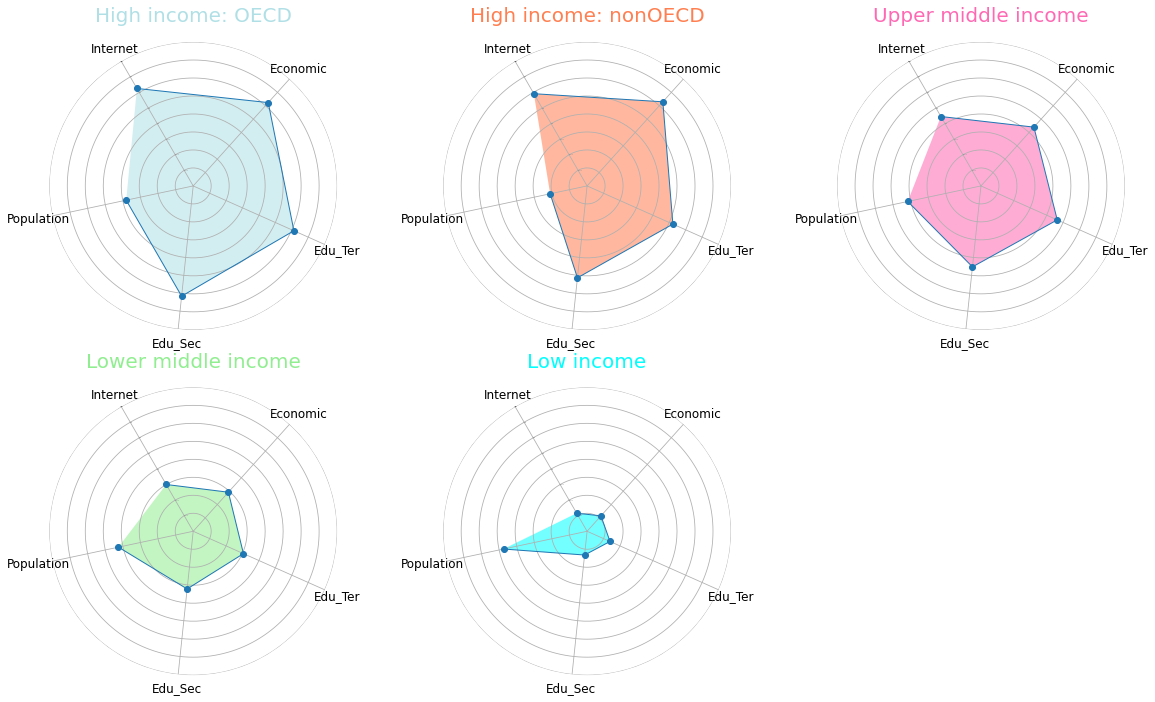

In [304]:
#On va creer les graphiques
df_graph = df_score_income[['Internet', 'Economic', 'Edu_Ter', 'Edu_Sec','Population']]

#Nombres des variables
category = list(df_graph.columns)

N= len(category)

angles = [n/float(N) *2 * pi for n in range(N)]

fig=plt.figure(1, figsize=(20,18))

colors = ['PowderBlue', 'Coral', 'HotPink', 'LightGreen', 'Cyan', 'RoyalBlue','Peru']

for i, region in enumerate(df_graph.index) : 
    
    ax = fig.add_subplot(3,3,i+1, polar=True)

    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, category, size=8)
    plt.yticks(color="grey", size=2)
    values=df_graph.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(category, fontsize=12)
    ax.set_title(region, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(-2,2)

plt.show()

<a class="anchor" id="section_13_2_2"></a>Heatmap

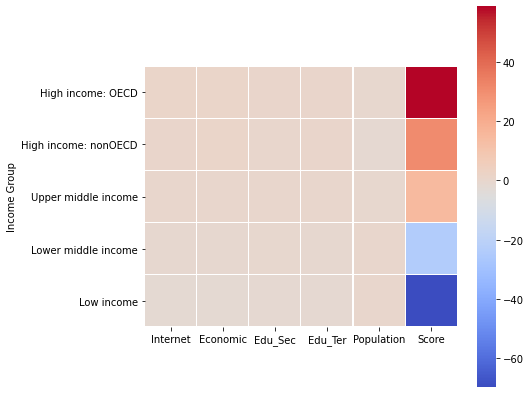

In [305]:
fig = plt.figure(1, figsize=(7,7))
income_graph = sns.heatmap(df_score_income, square=True, linewidths=0.1, cmap='coolwarm')
income_graph.set_yticklabels(income_graph.get_ymajorticklabels())
income_graph.set_xticklabels(income_graph.get_xmajorticklabels())
plt.show()

<a class="anchor" id="section_13_3"></a>Top 10 pays

In [306]:
df_top10_pays = df_score_scaled2[['Country Name','Score']].sort_values(by='Score',ascending=False).head(10)
df_top10_pays['Top 10']=np.arange(1, 11, 1)
df_top10_pays.rename(columns={'Country Name': 'Pays'}, inplace=True)
df_top10_pays.set_index('Top 10')

,Pays,Score
Top 10,,
1,Belgium,97.79309
2,Australia,86.38469
3,United States,84.12638
4,Netherlands,82.06630
5,Finland,80.77872
6,United Kingdom,79.27679
7,Spain,77.92403
8,Sweden,76.66008
9,Denmark,71.85819


<a class="anchor" id="section_13_3_1"></a>Graphique


In [308]:
df_test=df_top10_pays.copy()

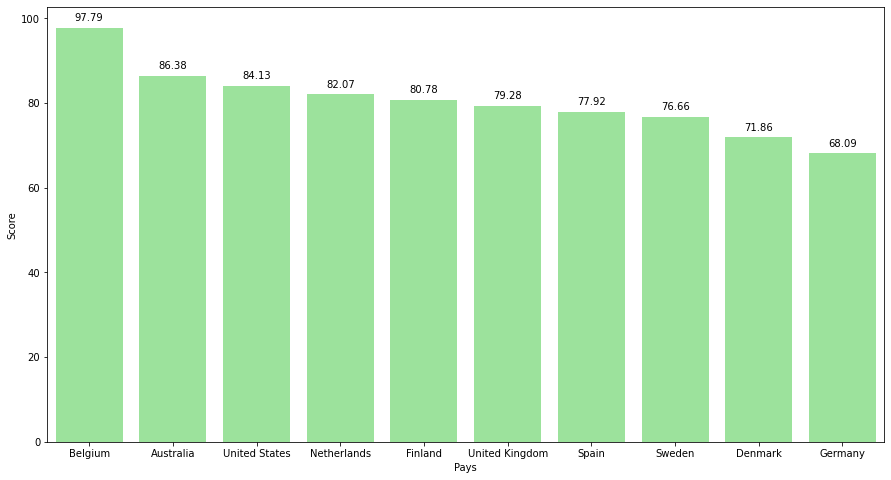

In [309]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x="Pays", y="Score", data=df_test, color="LightGreen")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [310]:
bel = df_score_scaled2[df_score_scaled2['Country Name'] == 'Belgium']
aus = df_score_scaled2[df_score_scaled2['Country Name'] == 'Australia']
usa = df_score_scaled2[df_score_scaled2['Country Name'] == 'United States']

In [311]:
bel

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,Country Name,Score
12,1.19764,1.22572,2.93822,1.12251,-0.17994,Belgium,97.79309


In [312]:
usa

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,Country Name,Score
135,0.90469,1.46207,0.438,1.34503,1.87674,United States,84.12638


In [313]:
aus

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,Country Name,Score
6,1.18417,1.22293,1.8598,1.43348,0.29829,Australia,86.38469


<a class="anchor" id="chapter14"></a>Conclusion

Selon le score, entre les trois premiers pays, la Belgique est la première, l'Australie la deuxième et les États-Unis la troisième. Lorsque nous vérifions les indicateurs pour les pays individuellement, nous pouvons voir que la Belgique a le score général le plus élevé mais que la population est la plus faible. 

Pour le ratio d'éducation, les États-Unis sont le troisième pays, mais ils ont la plus grande économie et la plus grande population. Entre ces deux pays, l'Australie et les Etats-Unis parlent l'anglais, et les Etats-Unis ont une plus grande population et sont économiquement dans une meilleure situation que l'Australie. 

Lorsque nous vérifions les spider graphiques pour les régions, nous pouvons voir que le potentiel le plus élevé se trouve en Amérique du Nord. Concernant pour le score des groupes de revenus, c'est le High Income qui est premier. De plus, le Canada est supprimé en raison du manque de données dans la section éducation. 

L'Amérique du Nord continentale a donc un potentiel élevé.